**Mike Hankinson**

April 21, 2022

#<b> Milestone 1: Data Analysis

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### <b>Loading libraries</b>

In [ ]:
#Importing libraries required to load the data

import zipfile
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU, GlobalAvgPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
#Storing the path of the data file from the Google drive
path = '/content/drive/Othercomputers/My Laptop/!Mike_Sync/!MIT_Applied_Data_Science/7_Capstone_Project/cell_images.zip'

#The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [ ]:
#Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

#Size of image so that each image has the same size
SIZE = 64

#Empty list to store the training images after they are converted to NumPy arrays
train_images = []

#Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            #Resizing each image to (64,64)
            image = image.resize((SIZE, SIZE))

            #Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                train_labels.append(1)
            else:
                train_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [ ]:
print(train_labels[:10])
print(train_images[:1])


[1 1 1 1 1 1 1 1 1 1]
[[[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]]


In [ ]:
#Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test/'

#Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

#Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

#Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            #Resizing each image to (64,64)
            image = image.resize((SIZE, SIZE))
            
            #Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                test_labels.append(1)
            else:
                test_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
print(test_labels[:10])
print(test_images[:1])


[1 1 1 1 1 1 1 1 1 1]
[[[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]]


###<b> Checking the shape of train and test images

In [ ]:
# shape of images

print("Shape train_images:", train_images[0].shape)
print("Shape test_images:", test_images[0].shape)


Shape train_images: (64, 64, 3)
Shape test_images: (64, 64, 3)


###<b> Checking the shape of train and test labels

In [ ]:
# shape of labels 

print("Shape train_labels:", train_labels.shape)
print("Shape test_labels:", test_labels.shape)
print()
print()
print("Count train_labels:", len(train_labels))
print("Count test_labels:", len(test_labels))

Shape train_labels: (24958,)
Shape test_labels: (2600,)


Count train_labels: 24958
Count test_labels: 2600


#####<b> Observations and insights: 
- Each of the train and test images have been transformed into 64 x 64 x 3 (RGB).
-	The training labels are 24,958 x 1 while the testing labels are 2,600 x 1.
- The training set encompasses 90.6% of the total data while the testing set makes up the balance of 9.4% of the data.


### <b>Check the minimum and maximum range of pixel values for train and test images

In [ ]:
# try to use min and max function from numpy
print("train_images maximum pixels:", np.amax(train_images), " train_images minimum pixels:", np.amin(train_images))
print()
print("test_images maximum pixels:", np.amax(test_images), " test_images minimum pixels:", np.amin(test_images))




train_images maximum pixels: 255  train_images minimum pixels: 0

test_images maximum pixels: 255  test_images minimum pixels: 0


#####<b> Observations and insights:
- In both the training and testing images, the maximum number of pixels is 255. 
- In both the training and testing images, the minimum number of pixels is 0. 



###<b> Count the number of values in both uninfected and parasitized 

In [ ]:
# try to use value_counts to count the values

print("Count of parasitized train data:",np.count_nonzero(train_labels == 1, axis=0))
print("Count of uninfected train data:",np.count_nonzero(train_labels == 0, axis=0))
print()
print("Count of parasitized test data:",np.count_nonzero(test_labels == 1, axis=0))
print("Count of uninfected test data:",np.count_nonzero(test_labels == 0, axis=0))


Count of parasitized train data: 12582
Count of uninfected train data: 12376

Count of parasitized test data: 1300
Count of uninfected test data: 1300


###<b>Normalize the images

In [ ]:
# try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function

train_images = (train_images/255).astype('float32')
test_images = (test_images/255).astype('float32')

#####<b> Observations and insights: 
- The values of parasitized and uninfected for in both train and test data are as follows:

|                      | Train Data | Test Data |
|----------------------|------------|-----------|
| Count of Parasitized | 12,582     | 1,300     |
| Count of Uninfected  | 12,376     | 1,300     |

- Since the pixel values range from 0-255, we normalized the data by dividing each image by 255.
- Finally, we converted the images to float32 data type.  
- Note: Normalization converts the data to values between 0 and 1.  Normalization helps avoid exploding gradient issues as well as reduces the risk of reaching a local, rather than global, optimum.  


###<b> Plot to check if the data is balanced

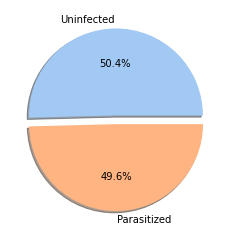

In [ ]:
# you are free to use bar plot or pie-plot or count plot, etc. to plot the labels of train and test data and check if they are balanced

import matplotlib.pyplot as plt
import seaborn as sns

#define data
train_para = np.count_nonzero(train_labels == 1, axis=0)
train_uninfect = np.count_nonzero(train_labels == 0, axis=0)
data = [train_para, train_uninfect]
labels = ['Uninfected', 'Parasitized']
explode = (0, 0.1)  # only "explode" the 2nd slice

#define Seaborn color palette to use
colors = sns.color_palette('pastel')#[0:1]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%1.1f%%', shadow=True, explode=explode)
plt.show()



In [ ]:
print(train_uninfect)
print(train_para)


12376
12582


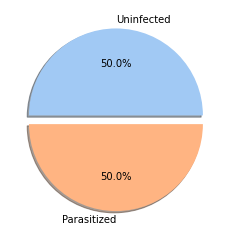

In [ ]:
#define data
test_para = np.count_nonzero(test_labels == 1, axis=0)
test_uninfect = np.count_nonzero(test_labels == 0, axis=0)
data = [test_para, test_uninfect]
labels = ['Uninfected', 'Parasitized']
explode = (0, 0.1)  # only "explode" the 2nd slice

#define Seaborn color palette to use
colors = sns.color_palette('pastel')#[0:1]

#create pie chart   
plt.pie(data, labels = labels, colors = colors, autopct='%1.1f%%', shadow=True, explode=explode)

plt.show()

#####<b> Observations and insights: 
- It is important to have nearly balanced data between classes for proper training of a neural network.
- The first pie graph above shows the training data set is nearly balanced between the two classes (uninfected and parasitized).
- Not nearly as important, yet notable, the test data is exactly balanced.
-	Since the training data set is balanced, no further techniques are warranted (oversampling, undersampling, class weight, etc.).

### <b>Data Exploration</b>
Let's visualize the images from the train data

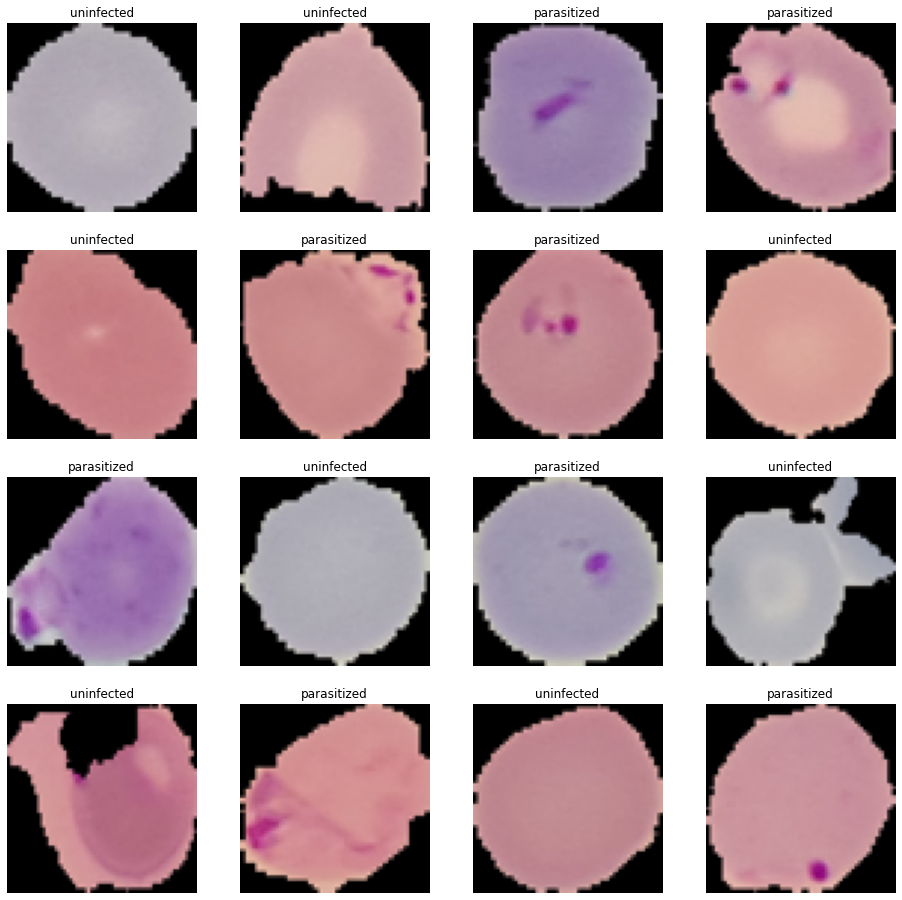

In [ ]:
# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)
plt.figure(1 , figsize = (16 , 16))

for n in range(1, 17):
    plt.subplot(4, 4, n)
    index = int(np.random.randint(0, train_images.shape[0], 1))
    if train_labels[index] == 1: 
        plt.title('parasitized')
    else:
        plt.title('uninfected')
    plt.imshow(train_images[index])
    plt.axis('off')

#####<b> Observations and insights: 
- The above visualization presents 8 uninfected and 8 parasitized red blood cells.
- Visually, the uninfected red blood cells tend to be uniform in color while the parasitized cells contain color anomalies/splotches within.


###<b> Similarly visualize the images with subplot(6,6) and figsize=(12,12)

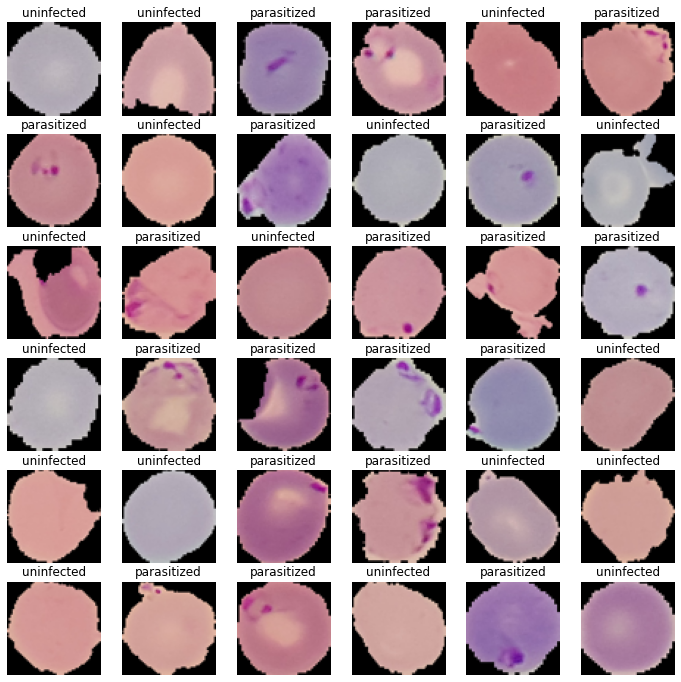

In [ ]:
# Hint: Have a keen look into the number of iterations that the for loop should iterate



# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)
plt.figure(1 , figsize = (12 , 12))

for n in range(1, 37):
    plt.subplot(6, 6, n)
    index = int(np.random.randint(0, train_images.shape[0], 1))
    if train_labels[index] == 1: 
        plt.title('parasitized')
    else:
        plt.title('uninfected')
    plt.imshow(train_images[index])
    plt.axis('off')

#####<b>Observations and insights:
- The above visualization presents 17 uninfected and 19 parasitized red blood cells.
- Confirming the previous pictures, the uninfected red blood cells tend to be uniform in color while the parasitized cells contain color anomalies/splotches within.

###<b> Plotting the mean images for parasitized and uninfected

In [ ]:
# function to find the mean
def find_mean_img(full_mat, title):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]
    # reshape it back to a matrix
    plt.imshow(mean_img)
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

<b> Mean image for parasitized

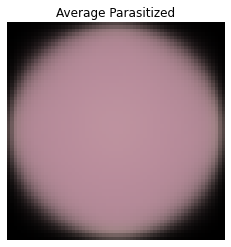

In [ ]:
# If the label=1 then the image is parasitised and if the label=0 then the image is uninfected
parasitized_data=[]                                # Create a list to store the parasitized data
for img, label in zip(train_images, train_labels):
        if label==1:
              parasitized_data.append([img])          

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean

<b> Mean image for uninfected

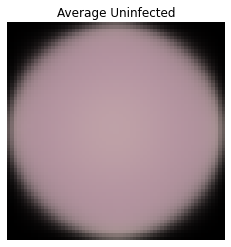

In [ ]:
# Similarly write the code to find the mean image of uninfected
uninfected_data=[]                                # Create a list to store the uninfected data
for img, label in zip(train_images, train_labels):
        if label==0:
              uninfected_data.append([img])          

uninfected_mean = find_mean_img(np.array(uninfected_data), 'Uninfected')   # find the mean



#####<b> Observations and insights:
- A composite (mean) image has been constructed for both classes.  
- The visual distinguishing factor between uninfected and parasitized cells has been eliminated.  The anomalies/splotches have been removed from the parasitized red blood cells. 

### <b>Converting RGB to HSV of Images using OpenCV


"In RGB, we cannot separate color information from luminance. HSV (Hue, Saturation, Value) is used to separate image luminance from color information."

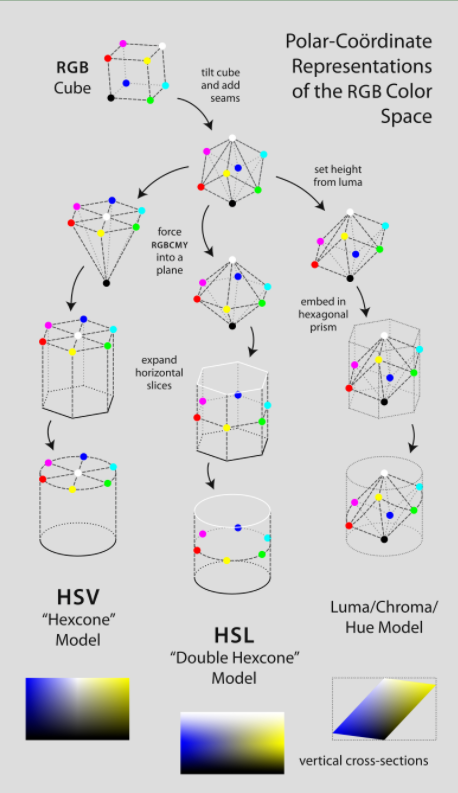


Image citation: Wikipedia [link text](https://en.wikipedia.org/wiki/HSL_and_HSV#/media/File:Hsl-and-hsv.svg)

####<b> Converting the train data

In [ ]:
import cv2
gfx=[]   # to hold the HSV image array
for i in np.arange(0,2000,1):
  a=cv2.cvtColor(train_images[i],cv2.COLOR_BGR2HSV)
  gfx.append(a)
gfx=np.array(gfx)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


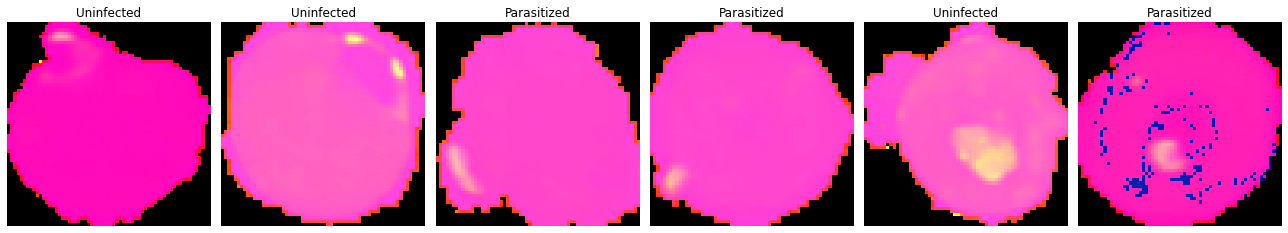

In [ ]:
viewimage=np.random.randint(1,2000,500)
fig,ax=plt.subplots(1,6,figsize=(18,18))
for t,i in zip(range(6),viewimage):
  if test_labels[i] == 1: 
        Title='Parasitized'
  else:
        Title ='Uninfected'
  ax[t].set_title(Title)
  ax[t].imshow(gfx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

####<b> Converting the test data

In [ ]:
# Similarly you can visualize for the images in the test data


gfx_test=[]   # to hold the HSV image array
for i in np.arange(0,2000,1):
  a=cv2.cvtColor(test_images[i],cv2.COLOR_BGR2HSV)
  gfx_test.append(a)
gfx_test=np.array(gfx_test)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


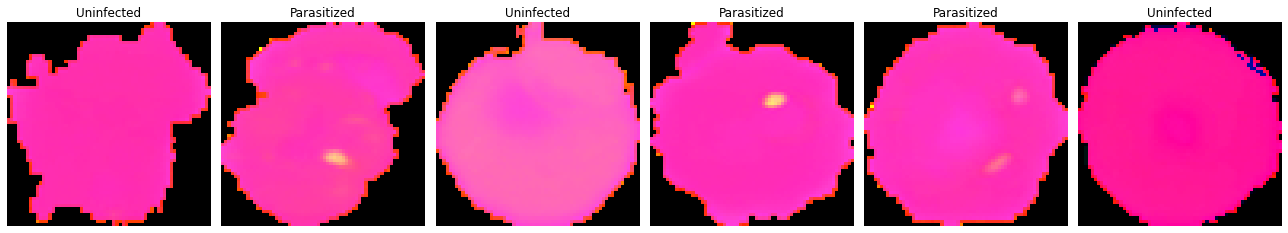

In [ ]:
viewimage=np.random.randint(1,2000,500)
fig,ax=plt.subplots(1,6,figsize=(18,18))
for t,i in zip(range(6),viewimage):
  if test_labels[i] == 1: 
        Title='Parasitized'
  else:
        Title ='Uninfected'
  ax[t].set_title(Title)
  ax[t].imshow(gfx_test[i])
  ax[t].set_axis_off()
  fig.tight_layout()

#####<b>Observations and insights: 
- For both train and test datasets, we have converted images from RGB to HSV.  
- Much research has been conducted to understand the "best" color space for Deep Convolutional Neural Networks.  It some cases, it comes down to application.  [link text](https://www.ijrte.org/wp-content/uploads/papers/v9i2/B4038079220.pdf)
- After HSV conversion, the parasitized images have a white hue within while the uninfected cells do not.  

###<b> Processing Images using Gaussian Blurring


"In image processing, a Gaussian blur (also known as Gaussian smoothing) is the result of blurring an image by a Gaussian function (named after mathematician and scientist Carl Friedrich Gauss).

It is a widely used effect in graphics software, typically to reduce image noise and reduce detail."

Reference: Wikipedia  [link text](https://en.wikipedia.org/wiki/Gaussian_blur#:~:text=In%20image%20processing%2C%20a%20Gaussian,image%20noise%20and%20reduce%20detail.)

####<b> Gaussian Blurring on train data

In [ ]:
gbx=[]  ## to hold the blurred images
for i in np.arange(0,2000,1):
  b= cv2.GaussianBlur(train_images[i], (5, 5), 0)
  gbx.append(b)
gbx=np.array(gbx)

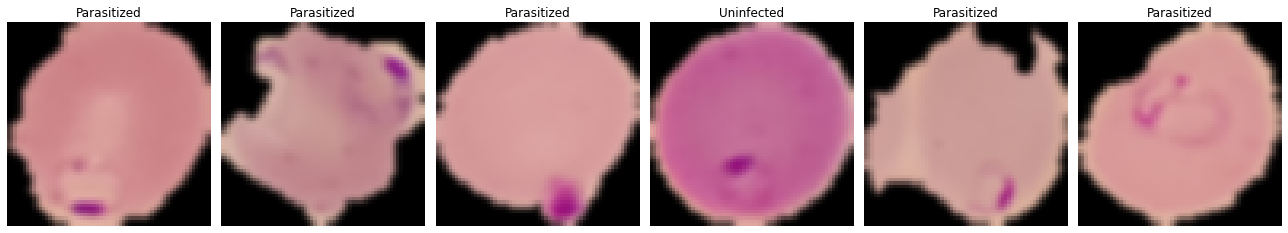

In [ ]:
viewimage=np.random.randint(1,2000,500)
fig,ax=plt.subplots(1,6,figsize=(18,18))
for t,i in zip(range(6),viewimage):
  if test_labels[i] == 1: 
        Title='Parasitized'
  else:
        Title ='Uninfected'
  ax[t].set_title(Title)
  ax[t].imshow(gbx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

####<b> Gaussian Blurring on test data

In [ ]:
# Similarly you can apply Gaussian blurring for the images in the test data

gbx_test=[]  ## to hold the blurred images
for i in np.arange(0, 2000, 1):
  b= cv2.GaussianBlur(test_images[i], (5, 5), 0)
  gbx_test.append(b)
gbx_test=np.array(gbx_test)

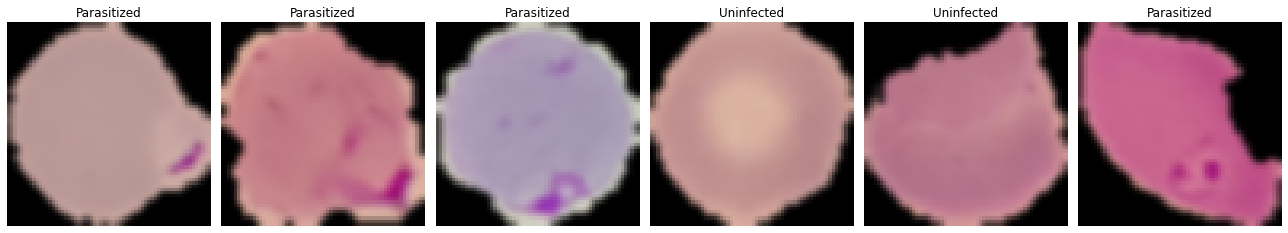

In [ ]:
viewimage=np.random.randint(1,2000, 500)
fig,ax=plt.subplots(1,6,figsize=(18,18))
for t,i in zip(range(6),viewimage):
  if test_labels[i] == 1: 
        Title='Parasitized'
  else:
        Title ='Uninfected'
  ax[t].set_title(Title)
  ax[t].imshow(gbx_test[i])
  ax[t].set_axis_off()
  fig.tight_layout()

#####**Observations and insights: **
- For both train and test datasets, we have applied Gaussian blurring.

**Think About It:** Would blurring help us for this problem statement in any way? What else can we try?

## **Proposed approach**

**Potential techniques:** What different techniques should be explored?<br>
- Run the CNN with various color spaces
  - RGB
  - HSV
  - YCbCr

**Overall solution design:** What is the potential solution design?<br>
- Define the model
  - Activation Function
  - Number of Layers
  - Number of Neurons per Layer
  - Neuron Dropout
  - Max Pooling
  - Flattening
  - Define Loss Function
  - Define Optimizer
  - Determine the number of epochs
  - Determine Success Metrics
  - Iterate through to Minimize Loss Function
- Compare model results to in-field results.  



#<b>Milestone 2: Predictive Modeling

###<b> Models Overview

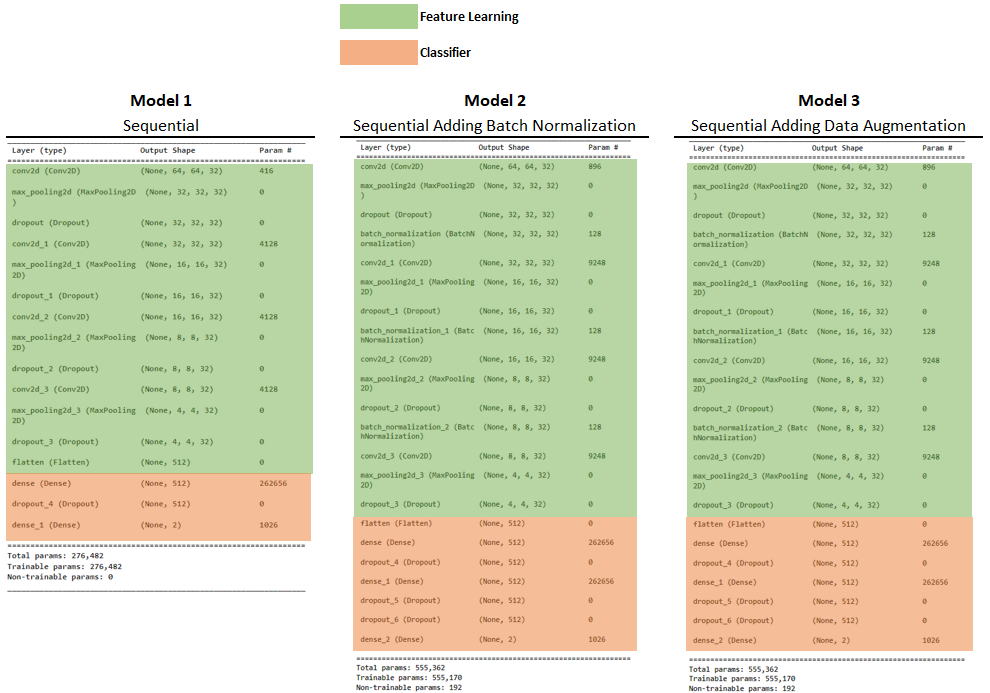

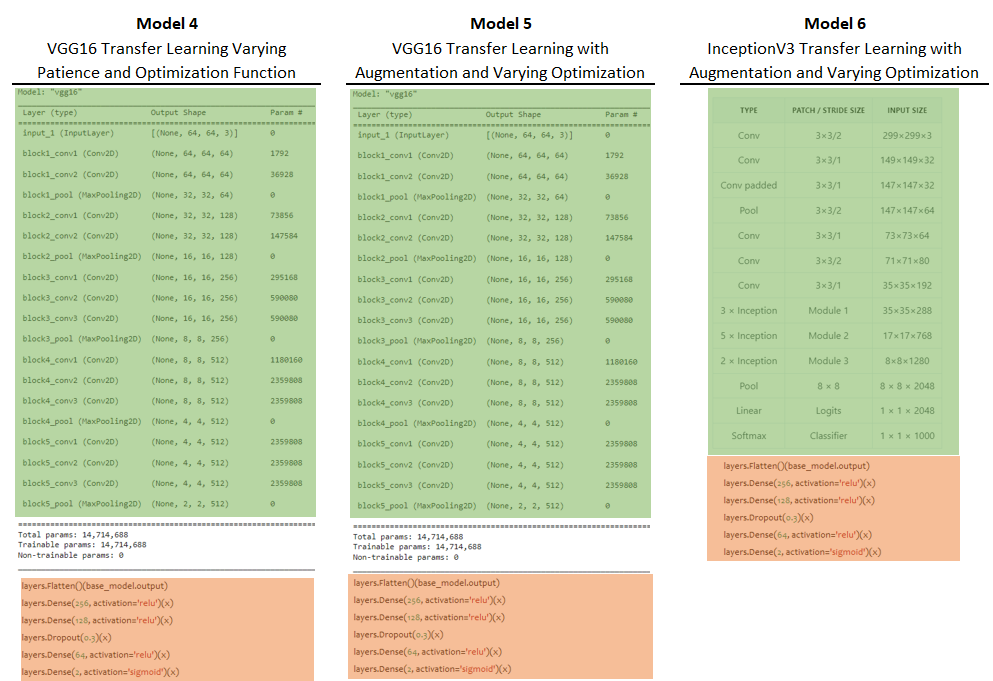

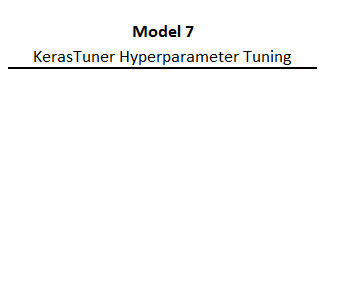

###<b> Mounting the Drive

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###<b>Loading libraries</b>

In [ ]:
#Importing libraries required to load the data

import zipfile
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU, GlobalAvgPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
#Storing the path of the data file from the Google drive
path = '/content/drive/Othercomputers/My Laptop/!Mike_Sync/!MIT_Applied_Data_Science/7_Capstone_Project/cell_images.zip'

#The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

The files have been extracted to the local session of Google Colab. The extracted folder would have the following structure:

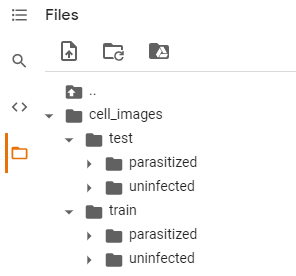

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [ ]:
#Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

#Size of image so that each image has the same size
SIZE = 64

#Empty list to store the training images after they are converted to NumPy arrays
train_images = []

#Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            #Resizing each image to (64,64)
            image = image.resize((SIZE, SIZE))

            #Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                train_labels.append(1)
            else:
                train_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [ ]:
#Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

#Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

#Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

#Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            #Resizing each image to (64,64)
            image = image.resize((SIZE, SIZE))
            
            #Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                test_labels.append(1)
            else:
                test_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

###<b>Normalize the images

In [ ]:
# try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images/255).astype('float32')
test_images = (test_images/255).astype('float32')

As we have done our preprocessing required and performed some EDA to gain some insights in our Milestone-1 so now we will try to build our model and try evaluating its performance.

###<B>One Hot Encoding on the train and test labels

In [ ]:
# Encoding Train Labels
train_labels=to_categorical(train_labels,2)
# Similarly let us try to encode test labels
test_labels=to_categorical(test_labels,2)

# print(train_labels)
#print(test_labels)



In [ ]:
# One Hot Encoding - Alternative
# using this utility function - https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

#train_labels = tf.keras.utils.to_categorical(train_labels)
#test_labels = tf.keras.utils.to_categorical(test_labels)

#train_labels

###<B>Train and Validation Accuracy Function

In [ ]:
# function to plot train and validation accuracy 
def plot_accuracy(history):
    N = len(history.history["accuracy"])
    plt.figure(figsize=(7,7))
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy", ls='--')
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy", ls='--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")

### **Base Model**


---



**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

####<b> Importing the required libraries

In [ ]:
#Clearing backend
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from random import shuffle

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

####<b> Building the model

In [ ]:
# Creating sequential model
model=Sequential()

# First Convolutional layer with 32 filters and kernel size of 2. Use the 'same' padding and input shape of 64*64*3
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(64,64,3)))

# max-pooling layer with a pool size of 2
model.add(MaxPooling2D(pool_size=2))

# Add dropout to randomly switch off 20% neurons to reduce overfitting
model.add(Dropout(0.2))

# Second Convolutional layer with 32 filters and kernel size of 2. Use the 'same' padding
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))

# max-pooling layer with a pool size of 2
model.add(MaxPooling2D(pool_size=2))

# Add dropout to randomly switch off 20% neurons to reduce overfitting
model.add(Dropout(0.2))

# Third Convolutional layer with 32 filters and kernel size of 2. Use the 'same' padding
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))

# max-pooling layer with a pool size of 2
model.add(MaxPooling2D(pool_size=2))

# Add dropout to randomly switch off 20% neurons to reduce overfitting
model.add(Dropout(0.2))

 # Flatten the output from the previous layer
model.add(Flatten())

# Output layer with nodes equal to the number of classes and softmax activation
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(2,activation="softmax"))   #2 represent output layer neurons 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

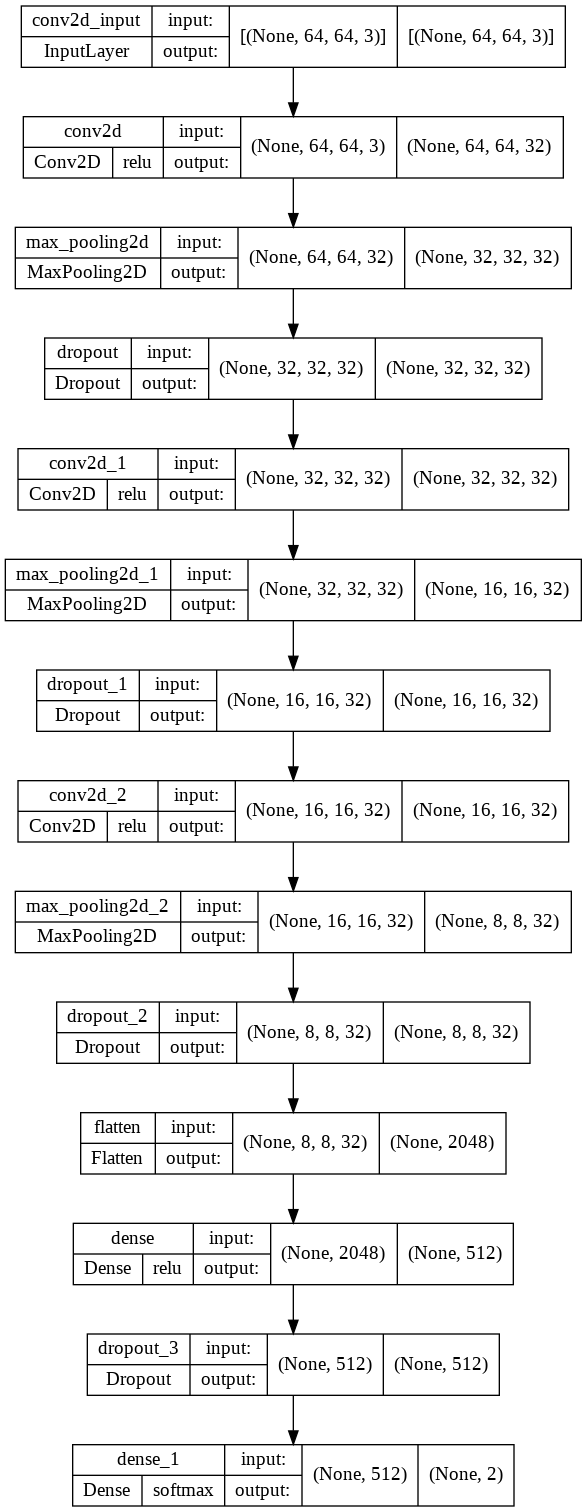

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True
)

####<b> Compiling the model

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

<b> Using Callbacks 

In [ ]:
# Callbacks help in saving the checkpoints and stopping at an accuracy where the model does not seem to improve

callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b> Fit and train our Model

In [ ]:
#Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history=model.fit(train_images,train_labels,batch_size=32,callbacks=callbacks,validation_split=0.2,epochs=20,verbose=1)




Epoch 1/20
624/624 [==============================] - 6s 6ms/step - loss: 0.4058 - accuracy: 0.7981 - val_loss: 0.1689 - val_accuracy: 0.9443
Epoch 2/20
624/624 [==============================] - 4s 6ms/step - loss: 0.1249 - accuracy: 0.9583 - val_loss: 0.1208 - val_accuracy: 0.9794
Epoch 3/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0929 - accuracy: 0.9707 - val_loss: 0.0841 - val_accuracy: 0.9842
Epoch 4/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0771 - accuracy: 0.9736 - val_loss: 0.0617 - val_accuracy: 0.9868
Epoch 5/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0729 - accuracy: 0.9748 - val_loss: 0.0848 - val_accuracy: 0.9786
Epoch 6/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0729 - accuracy: 0.9766 - val_loss: 0.0585 - val_accuracy: 0.9846
Epoch 7/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0671 - accuracy: 0.9768 - val_loss: 0.0695 - val_accuracy: 0.9820
Epoch 

####<b> Evaluating the model on test data

In [ ]:
accuracy = model.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 0s 4ms/step - loss: 0.0783 - accuracy: 0.9735

 Test_Accuracy:- 0.9734615087509155


<b> Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1300
           1       0.98      0.97      0.97      1300

    accuracy                           0.97      2600
   macro avg       0.97      0.97      0.97      2600
weighted avg       0.97      0.97      0.97      2600



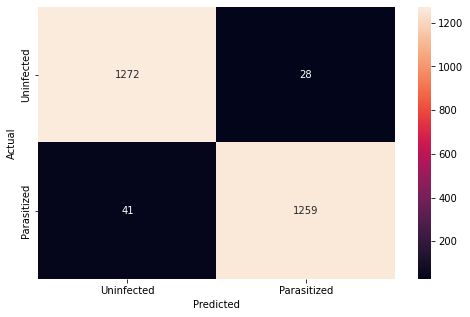

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)

#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<b>Plotting the train and validation curves

In [ ]:
# function to plot train and validation accuracy 
def plot_accuracy(history):
    N = len(history.history["accuracy"])
    plt.figure(figsize=(7,7))
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy", ls='--')
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy", ls='--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")

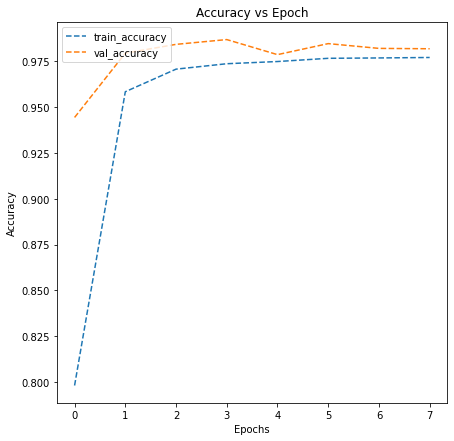

In [ ]:
plot_accuracy(history)

**Observations: Base Model**

* Here we can clearly observe that the training and valiation accuracy are increasing 
* And we can also notice that validation accuracy is slightly higher than the train accuracy

|         	| Test Accuracy 	| False negative<br>out of 1,300 	| False Positive<br>out of 1,300 	|
|---------	|---------------	|--------------------------------	|--------------------------------	|
| Base    	|      0.97     	|               41               	|               28               	|


So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1


---


####<b> Trying to improve the performance of our model by adding new layers


In [ ]:
#Clearing backend
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from random import shuffle

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

####<b> Building the Model

In [ ]:
# Define Activation Function
activation_f = "tanh"

#creating sequential model
model1=Sequential()

# First Convolutional layer with 32 filters and kernel size of 2. Use the 'same' padding and input shape of 64*64*3
model1.add(Conv2D(filters=32,kernel_size=2,padding="same",activation=activation_f,input_shape=(64,64,3)))

# max-pooling layer with a pool size of 2
model1.add(MaxPooling2D(pool_size=2))

# Add dropout to randomly switch off 20% neurons to reduce overfitting
model1.add(Dropout(0.2))

# Second Convolutional layer with 32 filters and kernel size of 2. Use the 'same' padding
model1.add(Conv2D(filters=32,kernel_size=2,padding="same",activation=activation_f,input_shape=(64,64,3)))

# max-pooling layer with a pool size of 2
model1.add(MaxPooling2D(pool_size=2))

# Add dropout to randomly switch off 20% neurons to reduce overfitting
model1.add(Dropout(0.2))

# Third Convolutional layer with 32 filters and kernel size of 2. Use the 'same' padding
model1.add(Conv2D(filters=32,kernel_size=2,padding="same",activation=activation_f,input_shape=(64,64,3)))

# max-pooling layer with a pool size of 2
model1.add(MaxPooling2D(pool_size=2))

# Add dropout to randomly switch off 20% neurons to reduce overfitting
model1.add(Dropout(0.2))



# forth Convolutional layer with 32 filters and kernel size of 2. Use the 'same' padding
model1.add(Conv2D(filters=32,kernel_size=2,padding="same",activation=activation_f,input_shape=(64,64,3)))

# max-pooling layer with a pool size of 2
model1.add(MaxPooling2D(pool_size=2))

# Add dropout to randomly switch off 20% neurons to reduce overfitting
model1.add(Dropout(0.2))


 # Flatten the output from the previous layer
model1.add(Flatten())

#
model1.add(Dense(512, activation = activation_f))

model1.add(Dropout(0.4))


# Output layer with nodes equal to the number of classes and softmax activation
model1.add(Dense(2,activation="softmax"))   #2 represent output layer neurons 
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

####<b> Compiling the model

In [ ]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

<b> Using Callbacks

In [ ]:
# Callbacks help in saving the checkpoints and stopping at an accuracy where the model does not seem to improve

callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]


<b>Fit and Train the model

In [ ]:
history1=model1.fit(train_images,train_labels,batch_size=32,callbacks=callbacks,validation_split=0.2,epochs=20,verbose=1)

Epoch 1/20
624/624 [==============================] - 5s 6ms/step - loss: 0.4484 - accuracy: 0.7765 - val_loss: 0.0703 - val_accuracy: 0.9599
Epoch 2/20
624/624 [==============================] - 4s 6ms/step - loss: 0.1661 - accuracy: 0.9398 - val_loss: 0.0753 - val_accuracy: 0.9659
Epoch 3/20
624/624 [==============================] - 4s 6ms/step - loss: 0.1367 - accuracy: 0.9507 - val_loss: 0.0930 - val_accuracy: 0.9671


####<b> Evaluating the model

In [ ]:
accuracy1 = model1.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy1[1])

82/82 [==============================] - 0s 3ms/step - loss: 0.1537 - accuracy: 0.9515

 Test_Accuracy:- 0.9515384435653687


<b> Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1300
           1       0.95      0.95      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



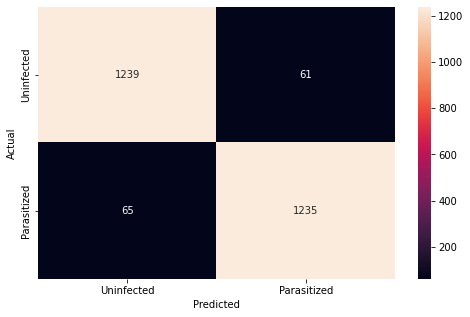

In [ ]:
pred1 = model1.predict(test_images)
pred1 = np.argmax(pred1,axis = 1) 
y_true1 = np.argmax(test_labels,axis = 1)

#Printing the classification report
print(classification_report(y_true1,pred1))

#Plotting the heatmap using confusion matrix
cm1 = confusion_matrix(y_true1,pred1)
plt.figure(figsize=(8,5))
sns.heatmap(cm1, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<b> Plotting the Train and validation curves

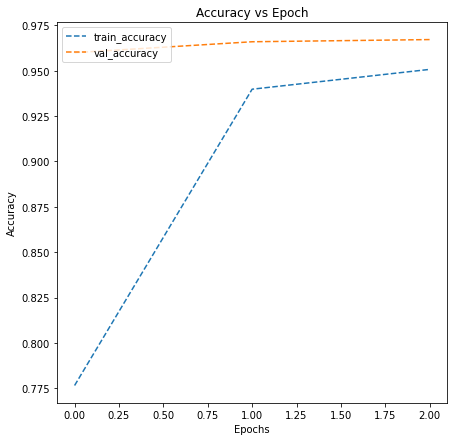

In [ ]:
plot_accuracy(history1)

**Observations: Model 1**
* After 5 epochs, 
  - the training accuracy is still increasing
  - the validation accuracy is decreasing
* The validation accuracy is higher than the train accuracy until the 5th epoch.  
* The test accuracy, as shown in the table below, is slightly lower than the base model.  


|         	| Test Accuracy 	| False negative<br>out of 1,300 	| False Positive<br>out of 1,300 	|
|---------	|---------------	|--------------------------------	|--------------------------------	|
| Base    	|      0.97     	|               41               	|               28               	|
| Model 1 	|      0.95     	|               65               	|               61               	|

###<b> Model 2: with Batch Normalization


---



In [ ]:
#Clearing backend
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from random import shuffle


#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

####<b> Building the Model

In [ ]:

# Define Activation Function
activation_f = LeakyReLU(0.1)

#creating sequential model
model2=Sequential()

# First Convolutional layer with 32 filters and kernel size of 2. Use the 'same' padding and input shape of 64*64*3
model2.add(Conv2D(32, (3,3), input_shape=(64, 64, 3), padding='same', activation=activation_f))

# max-pooling layer with a pool size of 2
model2.add(MaxPooling2D(pool_size=2))

# Add dropout to randomly switch off 20% neurons to reduce overfitting
model2.add(Dropout(0.2))


#BatchNormalization layer
model2.add(BatchNormalization())

# Second Convolutional layer with 32 filters and kernel size of 2. Use the 'same' padding
model2.add(Conv2D(32, (3,3), input_shape=(64, 64, 3), padding='same', activation=activation_f))

# max-pooling layer with a pool size of 2
model2.add(MaxPooling2D(pool_size=2))

# Add dropout to randomly switch off 20% neurons to reduce overfitting
model2.add(Dropout(0.2))



#BatchNormalization layer
model2.add(BatchNormalization())

# Third Convolutional layer with 32 filters and kernel size of 2. Use the 'same' padding
model2.add(Conv2D(32, (3,3), input_shape=(64, 64, 3), padding='same', activation=activation_f))

# max-pooling layer with a pool size of 2
model2.add(MaxPooling2D(pool_size=2))

# Add dropout to randomly switch off 20% neurons to reduce overfitting
model2.add(Dropout(0.2))



#BatchNormalization layer
model2.add(BatchNormalization())

# forth Convolutional layer with 32 filters and kernel size of 2. Use the 'same' padding
model2.add(Conv2D(32, (3,3), input_shape=(64, 64, 3), padding='same', activation=activation_f))

# max-pooling layer with a pool size of 2
model2.add(MaxPooling2D(pool_size=2))

# Add dropout to randomly switch off 20% neurons to reduce overfitting
model2.add(Dropout(0.2))

# Flatten the output from the previous layer
# https://towardsdatascience.com/the-most-intuitive-and-easiest-guide-for-convolutional-neural-network-3607be47480
model2.add(Flatten())


# Hidden Layer 1
model2.add(Dense(512, activation=activation_f))
model2.add(Dropout(0.2))

# Hidden Layer 2
model2.add(Dense(512, activation=activation_f))
model2.add(Dropout(0.1))



# Output layer with nodes equal to the number of classes and softmax activation
model2.add(Dropout(0.1))
model2.add(Dense(2,activation="softmax"))   #2 represent output layer neurons 

# Define Optimizer
adam = optimizers.Adam(learning_rate=0.001)

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0

####<b>Compiling the model

In [ ]:
model2.compile(loss="binary_crossentropy", optimizer=adam, metrics = ['accuracy'])

<b> Using callbacks

In [ ]:
# Callbacks help in saving the checkpoints and stopping at an accuracy where the model does not seem to improve

callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b>Fit and train the model

In [ ]:
history2 = model2.fit(train_images,train_labels,batch_size=32,callbacks=callbacks,validation_split=0.2,epochs=20,verbose=1)

Epoch 1/20
624/624 [==============================] - 5s 7ms/step - loss: 0.2589 - accuracy: 0.8844 - val_loss: 0.0331 - val_accuracy: 0.9954
Epoch 2/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0913 - accuracy: 0.9720 - val_loss: 0.0360 - val_accuracy: 0.9890
Epoch 3/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0830 - accuracy: 0.9759 - val_loss: 0.0624 - val_accuracy: 0.9788


<b>Plotting the train and validation accuracy

####<b>Evaluating the model

In [ ]:
accuracy2 = model2.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy2[1])

82/82 [==============================] - 0s 4ms/step - loss: 0.0959 - accuracy: 0.9788

 Test_Accuracy:- 0.9788461327552795


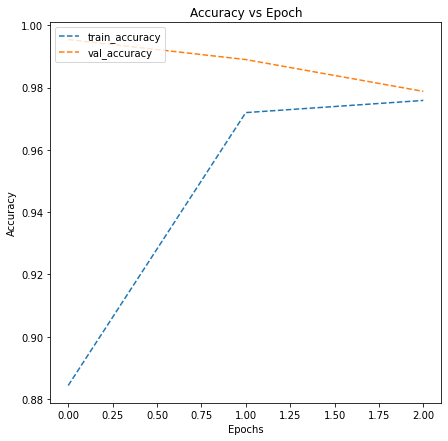

In [ ]:
# plotting the accuracies
plot_accuracy(history2)


<b> Generate the classification report and confusion matrix 

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1300
           1       0.97      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



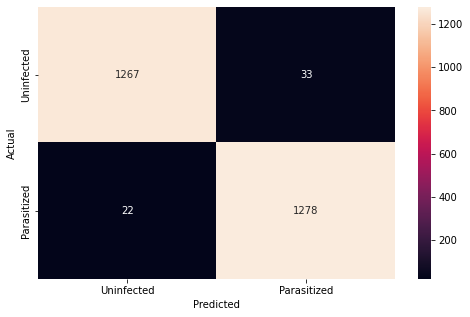

In [ ]:
pred2 = model2.predict(test_images)
pred2 = np.argmax(pred2,axis = 1) 
y_true2 = np.argmax(test_labels,axis = 1)
#Printing the classification report
print(classification_report(y_true2,pred2))

#Plotting the heatmap using confusion matrix
cm2 = confusion_matrix(y_true2,pred2)
plt.figure(figsize=(8,5))
sns.heatmap(cm2, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations: Model 2**
* After 2 epochs, 
  - the training accuracy is still increasing
  - the validation accuracy is decreasing
* The validation accuracy is higher than the train accuracy



|         	| Test Accuracy 	| False negative<br>out of 1,300 	| False Positive<br>out of 1,300 	|
|---------	|---------------	|--------------------------------	|--------------------------------	|
| Base    	|      0.97     	|               41               	|               28               	|
| Model 1 	|      0.95     	|               65               	|               61               	|
| Model 2 	|      0.98     	|               22               	|               33               	|

###<b>Model 3: Data Augmentaion Using Augmentaion Generator


---
[Reference](https://github.com/Harvard-IACS/2022-CS109B/blob/main/docs/labs/lab06/notebook/cs109b_lab06.ipynb)

- rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures.
- width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
- shear_range is for randomly applying shearing transformations.
- zoom_range is for randomly zooming inside pictures.
- horizontal_flip is for randomly flipping half the images horizontally—relevant when there are no assumptions of - horizontal asymmetry (for example, real-world pictures).
- fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

[Keras](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

####<b>Augmentation Generator

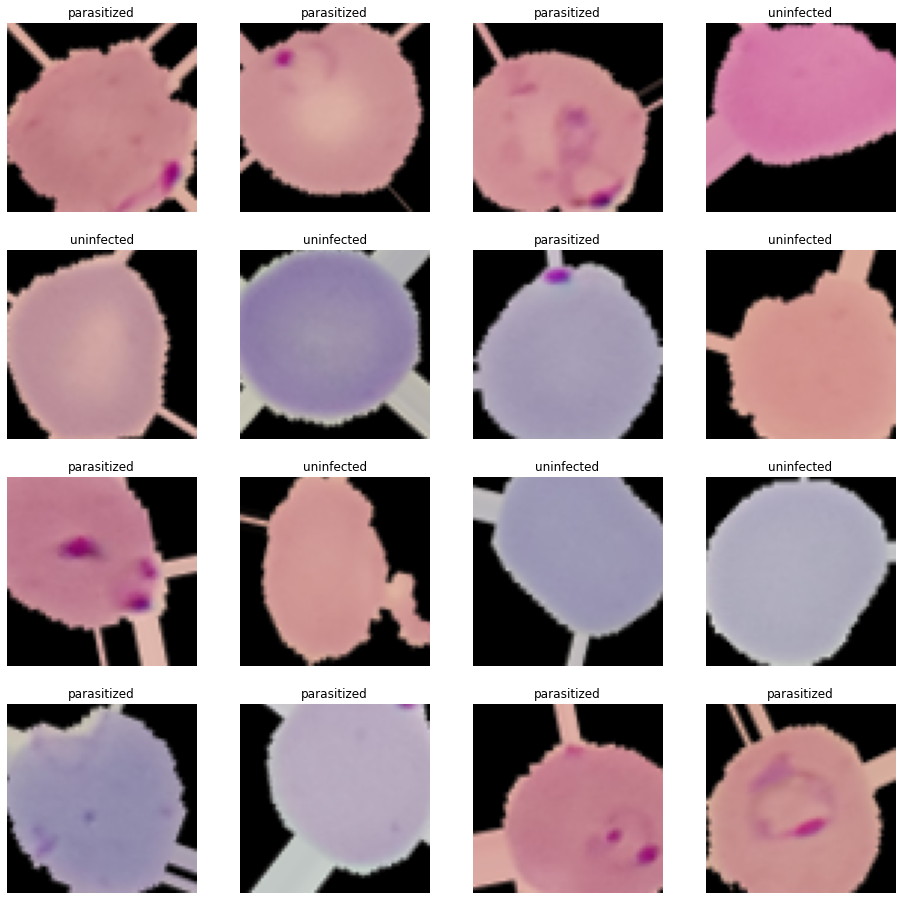

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Using ImageDataGenerator to generate images
          

# Add Noise
def add_noise(img):
    VARIABILITY = 0.1 # customize this
    deviation = VARIABILITY*np.random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    #img = np.clip(img, 0., 255.)
    return img

datagen_aug = ImageDataGenerator(
      #rescale=1./255,
      # customize these and other parameters
      rotation_range=45,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0,
      zoom_range=0,
      #preprocessing_function=add_noise,
      horizontal_flip=True,
      fill_mode='nearest',
)

val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = datagen_aug.flow(x = X_train, y = y_train, batch_size=64, seed=42, shuffle=True)     

# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x= X_val, y = y_val, batch_size=64, seed=42, shuffle=True)



#Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

#Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))
fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):
    ax.imshow(image)
    if label[1] == 1: 
        ax.set_title('parasitized')
    else:
        ax.set_title('uninfected')
    ax.axis('off')




In [ ]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

####<b>Building the Model

In [ ]:
# Define Activation Function
activation_f = LeakyReLU(0.1)

#creating sequential model
model6=Sequential()

# First Convolutional layer with 32 filters and kernel size of 2. Use the 'same' padding and input shape of 64*64*3
model6.add(Conv2D(32, (3,3), input_shape=(64, 64, 3), padding='same', activation=activation_f))

# max-pooling layer with a pool size of 2
model6.add(MaxPooling2D(pool_size=2))

# Add dropout to randomly switch off 20% neurons to reduce overfitting
model6.add(Dropout(0.2))

#BatchNormalization layer
model6.add(BatchNormalization())

# Second Convolutional layer with 32 filters and kernel size of 2. Use the 'same' padding
model6.add(Conv2D(32, (3,3), input_shape=(64, 64, 3), padding='same', activation=activation_f))

# max-pooling layer with a pool size of 2
model6.add(MaxPooling2D(pool_size=2))

# Add dropout to randomly switch off 20% neurons to reduce overfitting
model6.add(Dropout(0.2))

#BatchNormalization layer
model6.add(BatchNormalization())

# Third Convolutional layer with 32 filters and kernel size of 2. Use the 'same' padding
model6.add(Conv2D(32, (3,3), input_shape=(64, 64, 3), padding='same', activation=activation_f))

# max-pooling layer with a pool size of 2
model6.add(MaxPooling2D(pool_size=2))

# Add dropout to randomly switch off 20% neurons to reduce overfitting
model6.add(Dropout(0.2))

#BatchNormalization layer
model6.add(BatchNormalization())

# forth Convolutional layer with 32 filters and kernel size of 2. Use the 'same' padding
model6.add(Conv2D(32, (3,3), input_shape=(64, 64, 3), padding='same', activation=activation_f))

# max-pooling layer with a pool size of 2
model6.add(MaxPooling2D(pool_size=2))

# Add dropout to randomly switch off 20% neurons to reduce overfitting
model6.add(Dropout(0.2))

# Flatten the output from the previous layer
# https://towardsdatascience.com/the-most-intuitive-and-easiest-guide-for-convolutional-neural-network-3607be47480
model6.add(Flatten())

# Hidden Layer 1
model6.add(Dense(512, activation=activation_f))
model6.add(Dropout(0.2))

# Hidden Layer 2
model6.add(Dense(512, activation=activation_f))
model6.add(Dropout(0.1))

# Output layer with nodes equal to the number of classes and softmax activation
model6.add(Dropout(0.1))
model6.add(Dense(2,activation="softmax"))   #2 represent output layer neurons 

# Define Optimizer
adam = optimizers.Adam(learning_rate=0.001)

# Compile the Model
model6.compile(loss="binary_crossentropy", optimizer=adam, metrics = ['accuracy'])

model6.summary()

# Callbacks help in saving the checkpoints and stopping at an accuracy where the model does not seem to improve


callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0

####<B>Fit, Train and Evaluate the Model

In [ ]:
history6 = model6.fit(train_generator, 
                                  validation_data=val_generator,
                                  batch_size=32,callbacks=callbacks,
                                  epochs=20,verbose=1)


Epoch 1/20
312/312 [==============================] - 22s 66ms/step - loss: 0.3825 - accuracy: 0.8263 - val_loss: 0.7426 - val_accuracy: 0.5956
Epoch 2/20
312/312 [==============================] - 20s 65ms/step - loss: 0.1706 - accuracy: 0.9439 - val_loss: 0.1155 - val_accuracy: 0.9710
Epoch 3/20
312/312 [==============================] - 20s 65ms/step - loss: 0.1487 - accuracy: 0.9540 - val_loss: 0.0982 - val_accuracy: 0.9802
Epoch 4/20
312/312 [==============================] - 21s 66ms/step - loss: 0.1407 - accuracy: 0.9570 - val_loss: 0.1100 - val_accuracy: 0.9750
Epoch 5/20
312/312 [==============================] - 20s 65ms/step - loss: 0.1360 - accuracy: 0.9577 - val_loss: 0.0855 - val_accuracy: 0.9786
Epoch 6/20
312/312 [==============================] - 21s 67ms/step - loss: 0.1360 - accuracy: 0.9575 - val_loss: 0.0918 - val_accuracy: 0.9780
Epoch 7/20
312/312 [==============================] - 20s 65ms/step - loss: 0.1238 - accuracy: 0.9613 - val_loss: 0.0802 - val_accuracy:

In [ ]:
# Evaluating the model on test data
accuracy6 = model6.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy6[1])

82/82 [==============================] - 0s 4ms/step - loss: 0.0594 - accuracy: 0.9815

 Test_Accuracy:- 0.9815384745597839


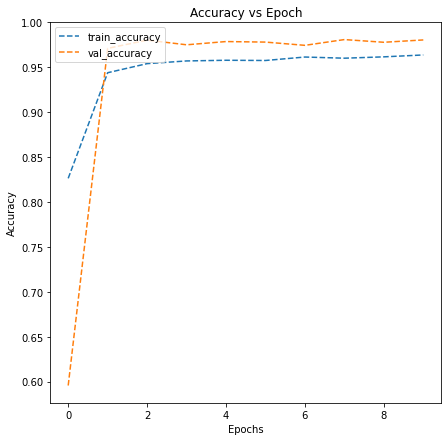

In [ ]:
# plotting the accuracies
plot_accuracy(history6)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1300
           1       0.98      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



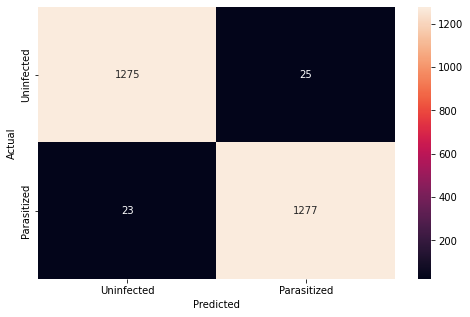

In [ ]:
pred6 = model6.predict(test_images)
pred6 = np.argmax(pred6,axis = 1) 
y_true6 = np.argmax(test_labels,axis = 1)
#Printing the classification report
print(classification_report(y_true6,pred6))

#Plotting the heatmap using confusion matrix
cm6 = confusion_matrix(y_true6,pred6)
plt.figure(figsize=(8,5))
sns.heatmap(cm6, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations: Model 3**

* In this model a data augmentation function was built in order to add noise and image augmentation.  This model was manually tweaked and was not optimized.  
- Similar to Model 3 (original augmentation model), both the training and validation accuracies reach a plateau around epoch 2.  
- Again, the validation accuracy is higher.  
- The test accuracy is identical to Model 3, as well.  

|         	| Test Accuracy 	| False negative<br>out of 1,300 	| False Positive<br>out of 1,300 	|
|---------	|---------------	|--------------------------------	|--------------------------------	|
| Base    	|      0.97     	|               41               	|               28               	|
| Model 1 	|      0.95     	|               65               	|               61               	|
| Model 2 	|      0.98     	|               22               	|               33               	|
| Model 3 	|      0.98     	|               23               	|               25               	|

###<b>Model 4: Transfer learning(VGG16)


---


- Transfer learning from pre-trained model (VGG16).  Using it for feature extraction.  
- Take the output of the 5th block of the VGG16 model as the input for the classification model.  
- Fit using train and test images, train_images and train_labels




**bold text**
- "By specifying the **argument include_top=False argument**, we load a **network that doesn't include the classification layers at the top** i.e. **we will use the VGG16 model only for feature extraction.**" - text from MLS+2_Case_Study_CIFAR


####<b>a. Base VGG16


In [ ]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint




#####<b> Building the Model

In [ ]:
#Feature Learning

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg = VGG16(include_top=False, weights='imagenet', input_shape=(64,64,3))
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     


- "The VGG16 model has **more than 14.7M trainable parameters.** 
- Here, **we will not train any of the layers from the VGG16 model**. We will use the pre-trained weights and biases.
- Also, we can take any layer's output from the VGG16 model as the input of our new model. Here, **we will take the output of the 5th block of the VGG16 model as the input of our new model.**" -  text from MLS+2_Case_Study_CIFAR

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable=False

# Add classification layers on top of it  
 
x = Flatten()(transfer_layer.output) #Flatten the output from the 5th block of the VGG16 model
x = Dense(256, activation='relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)

# Add a dense layer with 64 neurons
x = Dense(64, activation='relu')(x)

x = BatchNormalization()(x)
pred = Dense(2, activation='softmax')(x)

model4 = Model(vgg.input, pred) #Initializing the model

#####<b>Compiling the model

In [ ]:
model4.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adamax(learning_rate = 0.0005),
              metrics=['accuracy'])



<b> using callbacks

In [ ]:
# Callbacks help in saving the checkpoints and stopping at an accuracy where the model does not seem to improve

callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b>Fit and Train the model

In [ ]:
#Fitting the model and running the model for 10 epochs
history4 = model4.fit(
            train_images, train_labels,
            epochs=10,
            batch_size=32,
            validation_split=0.1,
            verbose=2
)



Epoch 1/10
702/702 - 10s - loss: 0.2711 - accuracy: 0.8891 - val_loss: 0.3317 - val_accuracy: 0.8590 - 10s/epoch - 14ms/step
Epoch 2/10
702/702 - 9s - loss: 0.1866 - accuracy: 0.9289 - val_loss: 0.1367 - val_accuracy: 0.9515 - 9s/epoch - 12ms/step
Epoch 3/10
702/702 - 9s - loss: 0.1705 - accuracy: 0.9360 - val_loss: 0.1483 - val_accuracy: 0.9479 - 9s/epoch - 12ms/step
Epoch 4/10
702/702 - 9s - loss: 0.1602 - accuracy: 0.9394 - val_loss: 0.2282 - val_accuracy: 0.9058 - 9s/epoch - 12ms/step
Epoch 5/10
702/702 - 9s - loss: 0.1507 - accuracy: 0.9451 - val_loss: 0.3445 - val_accuracy: 0.8610 - 9s/epoch - 12ms/step
Epoch 6/10
702/702 - 9s - loss: 0.1458 - accuracy: 0.9453 - val_loss: 0.1505 - val_accuracy: 0.9463 - 9s/epoch - 12ms/step
Epoch 7/10
702/702 - 9s - loss: 0.1412 - accuracy: 0.9493 - val_loss: 0.1397 - val_accuracy: 0.9459 - 9s/epoch - 12ms/step
Epoch 8/10
702/702 - 9s - loss: 0.1372 - accuracy: 0.9496 - val_loss: 0.1505 - val_accuracy: 0.9475 - 9s/epoch - 12ms/step
Epoch 9/10
702

<b>Plot the train and validation accuracy

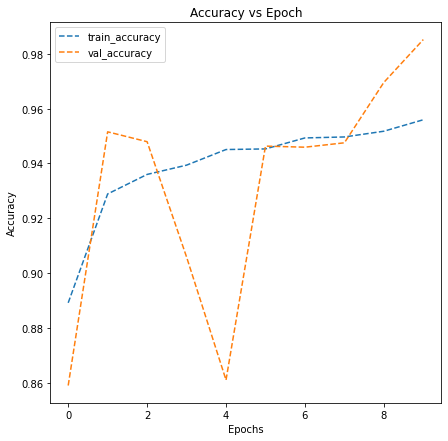

In [ ]:
# plotting the accuracies
plot_accuracy(history4)

In [ ]:
accuracy4 = model4.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy4[1])

82/82 [==============================] - 1s 12ms/step - loss: 0.1248 - accuracy: 0.9508

 Test_Accuracy:- 0.9507692456245422


#####<b> Evaluating the model

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1300
           1       0.98      0.92      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



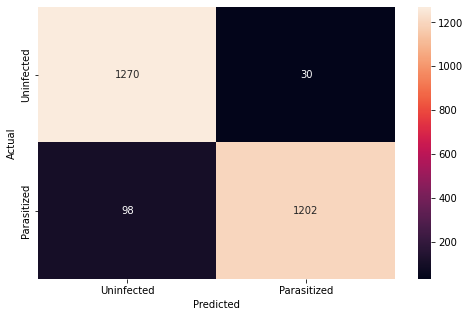

In [ ]:
# Evaluating the model on test data

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 

pred4 = model4.predict(test_images)
pred4 = np.argmax(pred4,axis = 1) 
y_true4 = np.argmax(test_labels,axis = 1)
#Printing the classification report
print(classification_report(y_true4,pred4))

#Plotting the heatmap using confusion matrix
cm4 = confusion_matrix(y_true4,pred4)
plt.figure(figsize=(8,5))
sns.heatmap(cm4, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


**Observations (thus far): Model 4**
* After 10 epochs the training accuracy was still increasing.  
- The validation accuracy had problems converging and jumped around.
- We'll add a test for optimum patience as well as optimization function experiment.     


####<b>b. Determine Optimum Model Patience

#####<b>Compiling the model

Epoch 1/20
702/702 - 10s - loss: 0.1262 - accuracy: 0.9536 - val_loss: 0.1815 - val_accuracy: 0.9299 - 10s/epoch - 14ms/step
Epoch 2/20
702/702 - 9s - loss: 0.1186 - accuracy: 0.9589 - val_loss: 0.0576 - val_accuracy: 0.9828 - 9s/epoch - 12ms/step
Epoch 3/20
702/702 - 9s - loss: 0.1166 - accuracy: 0.9582 - val_loss: 0.2063 - val_accuracy: 0.9267 - 9s/epoch - 12ms/step
Epoch 4/20
702/702 - 9s - loss: 0.1119 - accuracy: 0.9598 - val_loss: 0.2169 - val_accuracy: 0.9267 - 9s/epoch - 13ms/step
Epoch 5/20
702/702 - 9s - loss: 0.1104 - accuracy: 0.9609 - val_loss: 0.0929 - val_accuracy: 0.9708 - 9s/epoch - 12ms/step
Epoch 6/20
702/702 - 9s - loss: 0.1064 - accuracy: 0.9601 - val_loss: 0.1192 - val_accuracy: 0.9567 - 9s/epoch - 13ms/step
Epoch 7/20
702/702 - 9s - loss: 0.1036 - accuracy: 0.9623 - val_loss: 0.1867 - val_accuracy: 0.9295 - 9s/epoch - 12ms/step
Epoch 8/20
702/702 - 9s - loss: 0.1021 - accuracy: 0.9645 - val_loss: 0.2094 - val_accuracy: 0.9287 - 9s/epoch - 12ms/step
Epoch 9/20
702

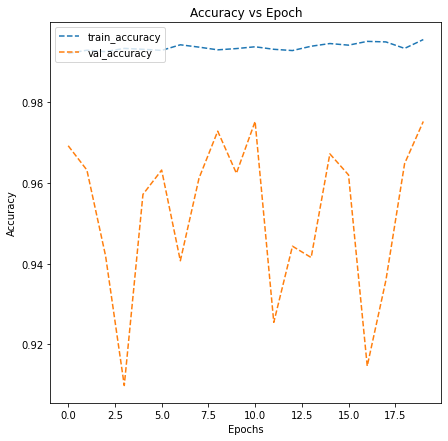

In [ ]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model4.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adamax(learning_rate = 0.0005),
              metrics=['accuracy'])

df_accuracy = pd.DataFrame()
df_val_accuracy = pd.DataFrame()

i=2
pat=2
for i in range(2, 6):

  # Callbacks help in saving the checkpoints and stopping at an accuracy where the model does not seem to improve
  callbacks = [EarlyStopping(monitor='val_loss', patience=i),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

  #Fitting the model and running the model for 20 epochs
  history4 = model4.fit(
            train_images, train_labels,
            epochs=20,
            batch_size=32,
            validation_split=0.1,
            verbose=2
  )

  #print(history4.history.keys())      https://stackoverflow.com/questions/36952763/how-to-return-history-of-validation-loss-in-keras

  df_accuracy = df_accuracy.append(history4.history['accuracy'])
  df_val_accuracy = df_val_accuracy.append(history4.history['val_accuracy'])
  i += 1

# plotting the accuracies
plot_accuracy(history4)





In [ ]:
df = pd.concat([df_accuracy, df_val_accuracy], axis=1)


df1 = df.copy()
df1.index.name='epoch'
df1.columns =['accuracy', 'val_accuracy']
df1.reset_index(inplace=True)
df1 = df1.assign(Patience=" ")

# iterate through each row and select 
pat=2
i=0
df1.at[i,'Patience']=pat

for i in range(len(df1)):
  if df1.iat[i,0] == 0 and i==0:
    df1.at[i,'Patience']=pat
  elif df1.iat[i,0] == 0 and i!=0:
    pat=pat+1
    df1.at[i,'Patience']=pat
  else:
    df1.at[i,'Patience']=pat
    #pat=pat+1
  i=i+1




#####<b>Plot the train and validation accuracy

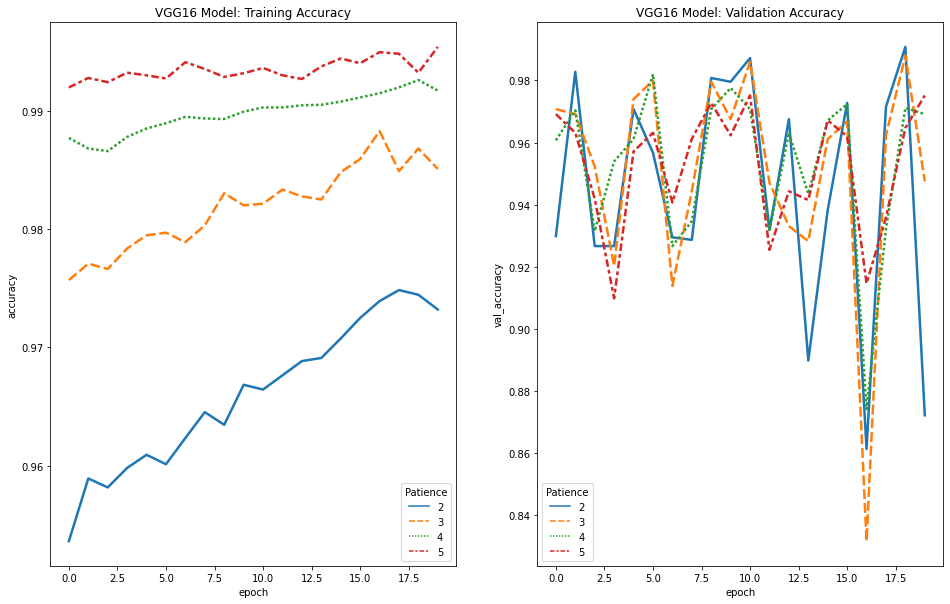

In [ ]:
fig, ax =plt.subplots(1,2)

sns.lineplot('epoch', 'accuracy', data=df1, hue="Patience",style="Patience", palette="tab10", linewidth=2.5, ax=ax[0]).set(title='VGG16 Model: Training Accuracy')
sns.lineplot('epoch', 'val_accuracy', data=df1, hue="Patience",style="Patience", palette="tab10", linewidth=2.5, ax=ax[1]).set(title='VGG16 Model: Validation Accuracy')

fig.set_size_inches( 16, 10)

fig.show()



In [ ]:
# Accuracy For top Model


accuracy4 = model4.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy4[1])

82/82 [==============================] - 1s 12ms/step - loss: 0.2784 - accuracy: 0.9446

 Test_Accuracy:- 0.944615364074707


              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1300
           1       0.94      0.95      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



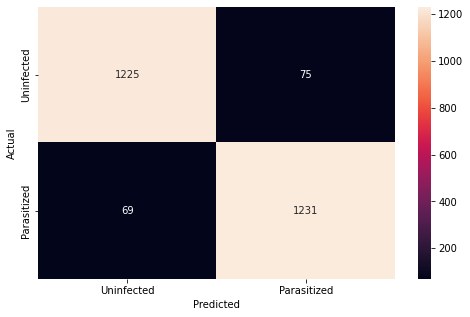

In [ ]:
# Evaluating the model on test data

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 

pred4 = model4.predict(test_images)
pred4 = np.argmax(pred4,axis = 1) 
y_true4 = np.argmax(test_labels,axis = 1)
#Printing the classification report
print(classification_report(y_true4,pred4))

#Plotting the heatmap using confusion matrix
cm4 = confusion_matrix(y_true4,pred4)
plt.figure(figsize=(8,5))
sns.heatmap(cm4, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


**Observations (thus far): Model 4**
- Increasing model callback patience...
  - increased training performance
  - did not increase validation accuracy on an already overfit model.  

####<b>c. Change Optimization Function

In [ ]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#####<b> Building the Model

In [ ]:
def build_model(optimizer):
  from tensorflow.keras.applications.vgg16 import VGG16
  from tensorflow.keras import Model

  vgg = VGG16(include_top=False, weights='imagenet', input_shape=(64,64,3))



  transfer_layer = vgg.get_layer('block5_pool')
  vgg.trainable=False

  # Add classification layers on top of it  
 
  x = Flatten()(transfer_layer.output) #Flatten the output from the 5th block of the VGG16 model
  x = Dense(256, activation='relu')(x)

  # Similarly add a dense layer with 128 neurons
  x = Dense(128, activation='relu')(x)
  x = Dropout(0.3)(x)

  # Add a dense layer with 64 neurons
  x = Dense(64, activation='relu')(x)

  x = BatchNormalization()(x)
  pred = Dense(2, activation='softmax')(x)

  model4 = Model(vgg.input, pred) #Initializing the model

  model4.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

  return model4


#####<b> Training Model

Reference:  Some Optimizer code came from https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-deep-learning-optimizers/#:~:text=An%20optimizer%20is%20a%20function,loss%20and%20improve%20the%20accuracy


In [ ]:
#Loop Through Optimizers

df_optimizer_comp = pd.DataFrame(columns=['Optimizer', 'Accuracy', 'Loss', 'Val_accuracy', 'Val_Loss'])

optimizer = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD', tf.keras.optimizers.Adamax(learning_rate = 0.0005)]


for i in optimizer:
  model4 = build_model(i)
  #Fitting the model and running the model for 10 epochs
  epochs=10
  history4 = model4.fit(
            train_images, train_labels,
            epochs=epochs,
            batch_size=32,
            validation_split=0.1,
            verbose=2
  )



  temp_df = pd.DataFrame( 
        {
          'Optimizer': i,
          #'Epoch': history4.history['Epoch']
          'Accuracy': history4.history['accuracy'],
          'Loss': history4.history['loss'], 
          'Val_accuracy': history4.history['val_accuracy'],
          'Val_Loss': history4.history['loss']
        }
      )
  df_optimizer_comp = df_optimizer_comp.append(temp_df, ignore_index=True)
  # Delete multiple columns from the dataframe
  temp_df = temp_df.drop(['Optimizer', 'Accuracy', 'Loss', 'Val_accuracy', 'Val_Loss'], axis=1)
  

Epoch 1/10
702/702 - 10s - loss: 0.8024 - accuracy: 0.5907 - val_loss: 0.8551 - val_accuracy: 0.4014 - 10s/epoch - 14ms/step
Epoch 2/10
702/702 - 9s - loss: 0.6743 - accuracy: 0.6637 - val_loss: 0.7535 - val_accuracy: 0.5581 - 9s/epoch - 12ms/step
Epoch 3/10
702/702 - 9s - loss: 0.6076 - accuracy: 0.7025 - val_loss: 0.6573 - val_accuracy: 0.6322 - 9s/epoch - 12ms/step
Epoch 4/10
702/702 - 9s - loss: 0.5548 - accuracy: 0.7303 - val_loss: 0.5895 - val_accuracy: 0.6935 - 9s/epoch - 12ms/step
Epoch 5/10
702/702 - 9s - loss: 0.5115 - accuracy: 0.7556 - val_loss: 0.5214 - val_accuracy: 0.7380 - 9s/epoch - 12ms/step
Epoch 6/10
702/702 - 9s - loss: 0.4805 - accuracy: 0.7742 - val_loss: 0.4821 - val_accuracy: 0.7652 - 9s/epoch - 12ms/step
Epoch 7/10
702/702 - 9s - loss: 0.4560 - accuracy: 0.7898 - val_loss: 0.4276 - val_accuracy: 0.8037 - 9s/epoch - 13ms/step
Epoch 8/10
702/702 - 9s - loss: 0.4361 - accuracy: 0.7976 - val_loss: 0.4030 - val_accuracy: 0.8157 - 9s/epoch - 12ms/step
Epoch 9/10
702

In [ ]:
df_optimizer_comp.insert(loc=5,
          column='Epoch',
          value=0)


In [ ]:
# iterate through each row 
Epoch = 0
i=0
for i in range(len(df_optimizer_comp)-1):
  if df_optimizer_comp.iat[i,0] == df_optimizer_comp.iat[(i+1),0]:
    Epoch = Epoch +1
    df_optimizer_comp.at[(i+1),"Epoch"]=Epoch
  else:
    Epoch = 0
    df_optimizer_comp.at[(i+1),"Epoch"]=Epoch

In [ ]:
df_optimizer_comp

Optimizer  Accuracy      Loss  \
0                                            Adadelta  0.590731  0.802437   
1                                            Adadelta  0.663654  0.674262   
2                                            Adadelta  0.702520  0.607563   
3                                            Adadelta  0.730256  0.554809   
4                                            Adadelta  0.755587  0.511539   
5                                            Adadelta  0.774196  0.480493   
6                                            Adadelta  0.789778  0.455977   
7                                            Adadelta  0.797614  0.436052   
8                                            Adadelta  0.813730  0.410878   
9                                            Adadelta  0.819517  0.400044   
10                                            Adagrad  0.840976  0.362262   
11                                            Adagrad  0.908379  0.236364   
12                                            Adagrad  0.920443  0.212059   
13                                            Adagrad  0.925741  0.198625   
14                                            Adagrad  0.931351  0.185805   
15                                            Adagrad  0.932864  0.178398   
16                                            Adagrad  0.935847  0.174200   
17                                            Adagrad  0.936292  0.169840   
18                                            Adagrad  0.941857  0.161771   
19                                            Adagrad  0.943015  0.156769   
20                                               Adam  0.900321  0.242717   
21                                               Adam  0.935758  0.171709   
22                                               Adam  0.941724  0.156410   
23                                               Adam  0.943460  0.149872   
24                                               Adam  0.947645  0.141155   
25                                               Adam  0.949248  0.134932   
26                                               Adam  0.952097  0.129813   
27                                               Adam  0.952498  0.127392   
28                                               Adam  0.954724  0.121959   
29                                               Adam  0.957884  0.117635   
30                                            RMSprop  0.906064  0.239500   
31                                            RMSprop  0.935358  0.172256   
32                                            RMSprop  0.940433  0.157821   
33                                            RMSprop  0.944350  0.149554   
34                                            RMSprop  0.946576  0.143270   
35                                            RMSprop  0.948491  0.141421   
36                                            RMSprop  0.950494  0.136573   
37                                            RMSprop  0.951073  0.133733   
38                                            RMSprop  0.952943  0.128206   
39                                            RMSprop  0.955258  0.126666   
40                                                SGD  0.867421  0.308649   
41                                                SGD  0.915324  0.215590   
42                                                SGD  0.925697  0.192769   
43                                                SGD  0.930327  0.180309   
44                                                SGD  0.935090  0.170956   
45                                                SGD  0.933844  0.170304   
46                                                SGD  0.936782  0.165404   
47                                                SGD  0.937851  0.162903   
48                                                SGD  0.942214  0.154237   
49                                                SGD  0.942970  0.153804   
50  <keras.optimizer_v2.adamax.Adamax object at 0x...  0.893197  0.260666   
51  <keras.optimizer_v2.adamax.Adamax ob

#####<b>Plot the train and validation accuracy

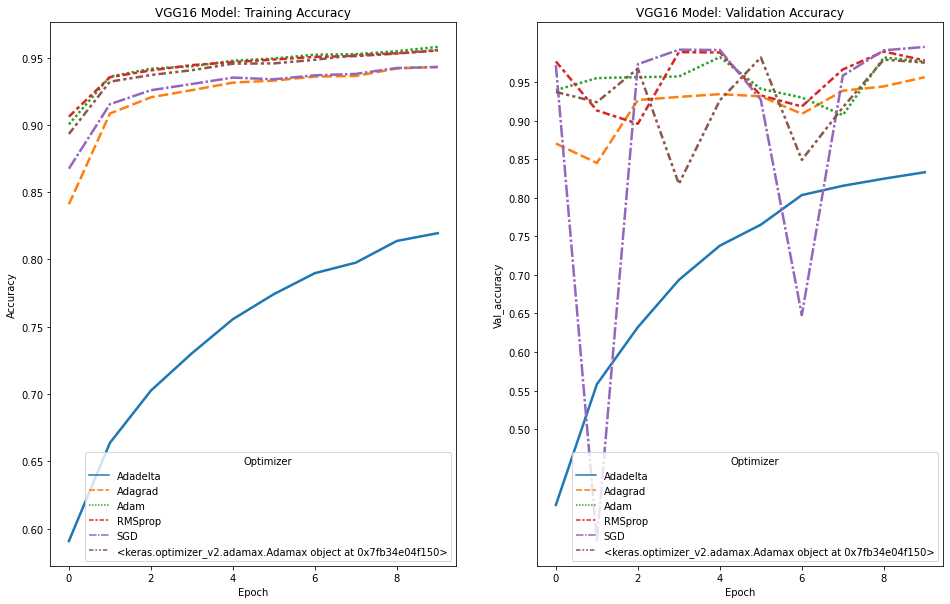

In [ ]:
fig, ax =plt.subplots(1,2)

sns.lineplot('Epoch', 'Accuracy', data=df_optimizer_comp, hue="Optimizer",style="Optimizer", palette="tab10", linewidth=2.5, ax=ax[0]).set(title='VGG16 Model: Training Accuracy')
sns.lineplot('Epoch', 'Val_accuracy', data=df_optimizer_comp, hue="Optimizer",style="Optimizer", palette="tab10", linewidth=2.5, ax=ax[1]).set(title='VGG16 Model: Validation Accuracy')

plt.yticks(np.arange(0.50, 1.00, 0.05))
fig.set_size_inches(16,10)

fig.show()

In [ ]:
accuracy4 = model4.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy4[1])

82/82 [==============================] - 1s 12ms/step - loss: 0.1173 - accuracy: 0.9542

 Test_Accuracy:- 0.954230785369873


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1300
           1       0.96      0.95      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



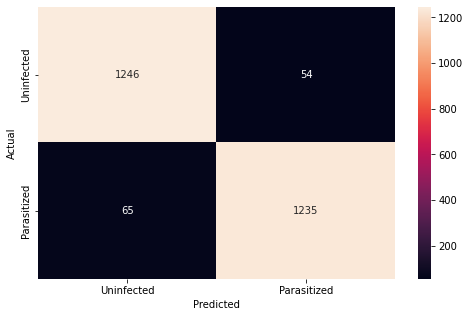

In [ ]:
# Evaluating the model on test data

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 

pred4 = model4.predict(test_images)
pred4 = np.argmax(pred4,axis = 1) 
y_true4 = np.argmax(test_labels,axis = 1)
#Printing the classification report
print(classification_report(y_true4,pred4))

#Plotting the heatmap using confusion matrix
cm4 = confusion_matrix(y_true4,pred4)
plt.figure(figsize=(8,5))
sns.heatmap(cm4, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


**Observations: Model 4**
- Demonstrates the relative performance of various optimizers
- Increasing model callback patience...
  - increased training performance
  - did not increase validation accuracy on an already overfit model.  



|         	| Test Accuracy 	| False negative<br>out of 1,300 	| False Positive<br>out of 1,300 	|
|---------	|---------------	|--------------------------------	|--------------------------------	|
| Base    	|      0.97     	|               41               	|               28               	|
| Model 1 	|      0.95     	|               65               	|               61               	|
| Model 2 	|      0.98     	|               22               	|               33               	|
| Model 3 	|      0.98     	|               23               	|               25               	|
| Model 4 	|      0.95     	|               65               	|               54               	|

###<b>Model 5: Transfer learning with data augmentation (VGG16)


---


- Transfer learning from pre-trained model (VGG16).  Using it for feature extraction.  
- Take the output of the 5th block of the VGG16 model as the input for the classification model.  
- Fit using horizontal_flipped augmented images, train_generator

Reference:  VGG16 code from https://keras.io/api/applications/vgg/


####<b>Augmentation Generator

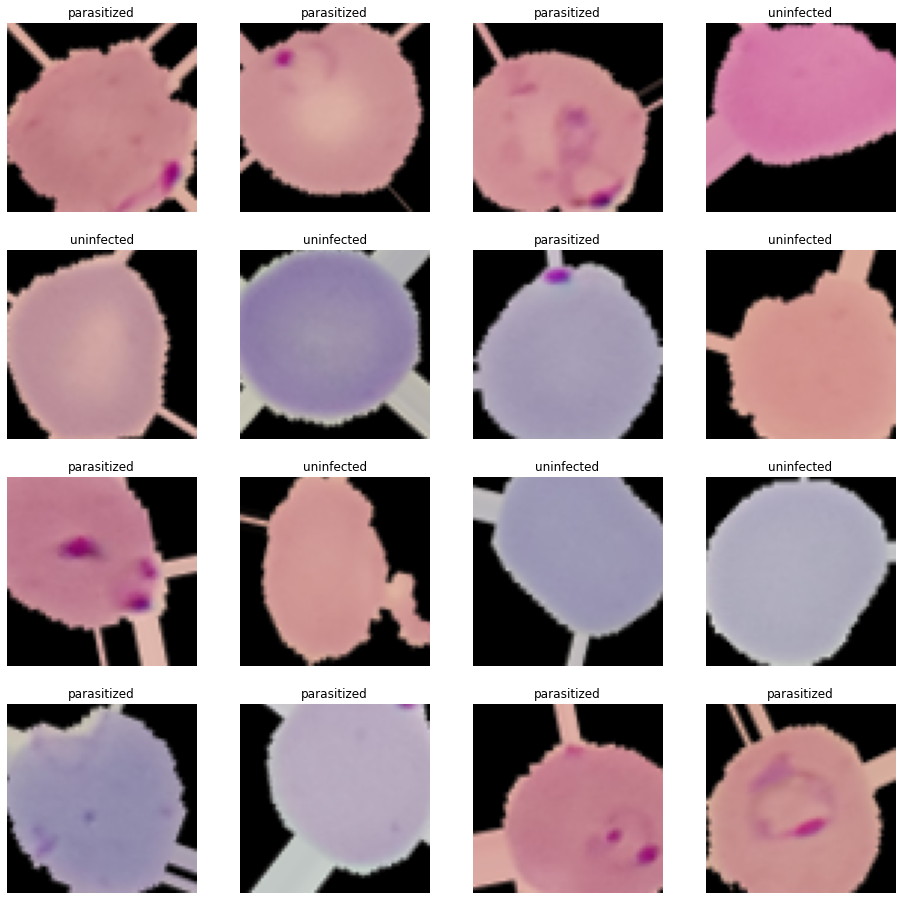

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Using ImageDataGenerator to generate images
          

# Add Noise
def add_noise(img):
    VARIABILITY = 0.1 # customize this
    deviation = VARIABILITY*np.random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    #img = np.clip(img, 0., 255.)
    return img

datagen_aug = ImageDataGenerator(
      #rescale=1./255,
      # customize these and other parameters
      rotation_range=45,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0,
      zoom_range=0,
      #preprocessing_function=add_noise,
      horizontal_flip=True,
      fill_mode='nearest',
)

val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = datagen_aug.flow(x = X_train, y = y_train, batch_size=64, seed=42, shuffle=True)     

# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x= X_val, y = y_val, batch_size=64, seed=42, shuffle=True)



#Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

#Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))
fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):
    ax.imshow(image)
    if label[1] == 1: 
        ax.set_title('parasitized')
    else:
        ax.set_title('uninfected')
    ax.axis('off')




In [ ]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

####<b> Building the Model

In [ ]:
def build_model(optimizer):
  from tensorflow.keras.applications.vgg16 import VGG16
  from tensorflow.keras import Model

  vgg = VGG16(include_top=False, weights='imagenet', input_shape=(64,64,3))



  transfer_layer = vgg.get_layer('block5_pool')
  vgg.trainable=False

  # Add classification layers on top of it  
 
  x = Flatten()(transfer_layer.output) #Flatten the output from the 5th block of the VGG16 model
  x = Dense(256, activation='relu')(x)

  # Similarly add a dense layer with 128 neurons
  x = Dense(128, activation='relu')(x)
  x = Dropout(0.3)(x)

  # Add a dense layer with 64 neurons
  x = Dense(64, activation='relu')(x)

  x = BatchNormalization()(x)
  pred = Dense(2, activation='softmax')(x)

  model5 = Model(vgg.input, pred) #Initializing the model

  model5.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

  return model5


####<b> Training Model


In [ ]:
#Loop Through Optimizers

df_optimizer_comp = pd.DataFrame(columns=['Optimizer', 'Accuracy', 'Loss', 'Val_accuracy', 'Val_Loss'])

optimizer = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD', tf.keras.optimizers.Adamax(learning_rate = 0.0005)]


for i in optimizer:
  model5 = build_model(i)
  #Fitting the model and running the model for 10 epochs
  epochs=10
  history5 = model5.fit(
            train_generator, validation_data=val_generator,
            epochs=epochs,
            batch_size=32,
            #validation_split=0.1,
            verbose=2
  )



  temp_df = pd.DataFrame( 
        {
          'Optimizer': i,
          #'Epoch': history5.history['Epoch']
          'Accuracy': history5.history['accuracy'],
          'Loss': history5.history['loss'], 
          'Val_accuracy': history5.history['val_accuracy'],
          'Val_Loss': history5.history['loss']
        }
      )
  df_optimizer_comp = df_optimizer_comp.append(temp_df, ignore_index=True)
  # Delete multiple columns from the dataframe
  temp_df = temp_df.drop(['Optimizer', 'Accuracy', 'Loss', 'Val_accuracy', 'Val_Loss'], axis=1)
  

Epoch 1/10
312/312 - 23s - loss: 0.8810 - accuracy: 0.5434 - val_loss: 0.6100 - val_accuracy: 0.6284 - 23s/epoch - 74ms/step
Epoch 2/10
312/312 - 21s - loss: 0.8173 - accuracy: 0.5749 - val_loss: 0.5855 - val_accuracy: 0.6526 - 21s/epoch - 69ms/step
Epoch 3/10
312/312 - 22s - loss: 0.7608 - accuracy: 0.6068 - val_loss: 0.5492 - val_accuracy: 0.7063 - 22s/epoch - 70ms/step
Epoch 4/10
312/312 - 21s - loss: 0.7322 - accuracy: 0.6234 - val_loss: 0.5187 - val_accuracy: 0.7504 - 21s/epoch - 68ms/step
Epoch 5/10
312/312 - 21s - loss: 0.7075 - accuracy: 0.6401 - val_loss: 0.4927 - val_accuracy: 0.7804 - 21s/epoch - 67ms/step
Epoch 6/10
312/312 - 21s - loss: 0.6777 - accuracy: 0.6569 - val_loss: 0.4765 - val_accuracy: 0.7995 - 21s/epoch - 67ms/step
Epoch 7/10
312/312 - 21s - loss: 0.6547 - accuracy: 0.6727 - val_loss: 0.4634 - val_accuracy: 0.8093 - 21s/epoch - 68ms/step
Epoch 8/10
312/312 - 21s - loss: 0.6354 - accuracy: 0.6816 - val_loss: 0.4510 - val_accuracy: 0.8189 - 21s/epoch - 66ms/step


In [ ]:
df_optimizer_comp.insert(loc=5,
          column='Epoch',
          value=0)


In [ ]:
# iterate through each row 
Epoch = 0
i=0
for i in range(len(df_optimizer_comp)-1):
  if df_optimizer_comp.iat[i,0] == df_optimizer_comp.iat[(i+1),0]:
    Epoch = Epoch +1
    df_optimizer_comp.at[(i+1),"Epoch"]=Epoch
  else:
    Epoch = 0
    df_optimizer_comp.at[(i+1),"Epoch"]=Epoch

In [ ]:
df_optimizer_comp

Optimizer  Accuracy      Loss  \
0                                            Adadelta  0.543424  0.881049   
1                                            Adadelta  0.574877  0.817288   
2                                            Adadelta  0.606782  0.760786   
3                                            Adadelta  0.623410  0.732203   
4                                            Adadelta  0.640088  0.707544   
5                                            Adadelta  0.656867  0.677688   
6                                            Adadelta  0.672694  0.654690   
7                                            Adadelta  0.681609  0.635413   
8                                            Adadelta  0.696684  0.611453   
9                                            Adadelta  0.701643  0.600435   
10                                            Adagrad  0.744315  0.532149   
11                                            Adagrad  0.828008  0.400361   
12                                            Adagrad  0.843684  0.366071   
13                                            Adagrad  0.853801  0.344611   
14                                            Adagrad  0.865571  0.329646   
15                                            Adagrad  0.869528  0.320302   
16                                            Adagrad  0.874737  0.311719   
17                                            Adagrad  0.877442  0.307354   
18                                            Adagrad  0.882450  0.298537   
19                                            Adagrad  0.879996  0.295673   
20                                               Adam  0.846088  0.361537   
21                                               Adam  0.887208  0.281323   
22                                               Adam  0.895172  0.266842   
23                                               Adam  0.897826  0.257056   
24                                               Adam  0.899980  0.253121   
25                                               Adam  0.898828  0.252128   
26                                               Adam  0.904087  0.244739   
27                                               Adam  0.905539  0.243824   
28                                               Adam  0.905840  0.240308   
29                                               Adam  0.909797  0.232170   
30                                            RMSprop  0.852399  0.350698   
31                                            RMSprop  0.890364  0.276424   
32                                            RMSprop  0.894070  0.267676   
33                                            RMSprop  0.895172  0.260797   
34                                            RMSprop  0.901432  0.250562   
35                                            RMSprop  0.901232  0.250908   
36                                            RMSprop  0.907092  0.239861   
37                                            RMSprop  0.903085  0.244733   
38                                            RMSprop  0.905139  0.239133   
39                                            RMSprop  0.907092  0.236354   
40                                                SGD  0.804668  0.430959   
41                                                SGD  0.859511  0.336394   
42                                                SGD  0.876290  0.304783   
43                                                SGD  0.882100  0.287702   
44                                                SGD  0.890163  0.276735   
45                                                SGD  0.890464  0.272284   
46                                                SGD  0.895222  0.263745   
47                                                SGD  0.892718  0.269073   
48                                                SGD  0.890864  0.269843   
49                                                SGD  0.898077  0.259751   
50  <keras.optimizer_v2.adamax.Adamax object at 0x...  0.834368  0.379209   
51  <keras.optimizer_v2.adamax.Adamax ob

####<b>Plot the train and validation accuracy

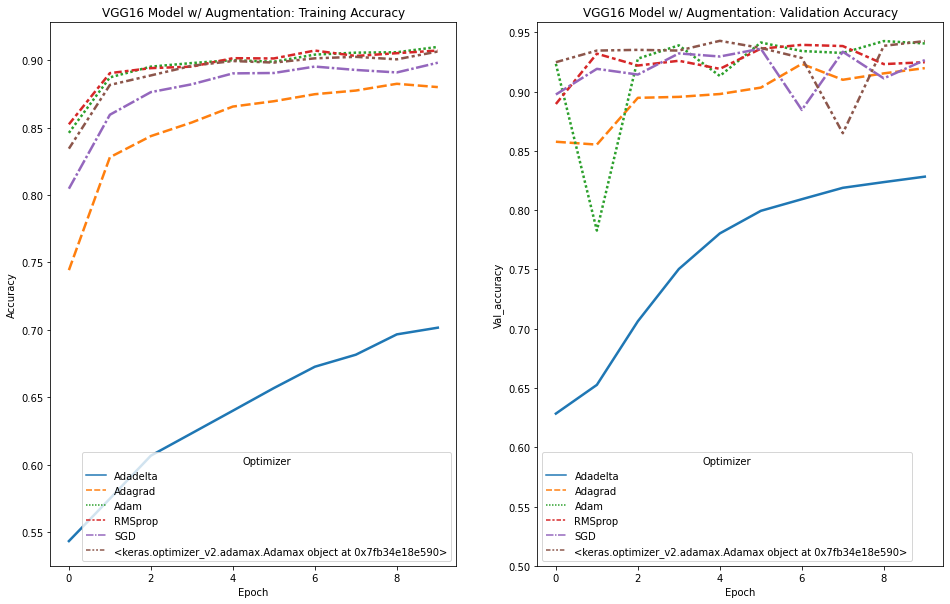

In [ ]:
fig, ax =plt.subplots(1,2)

sns.lineplot('Epoch', 'Accuracy', data=df_optimizer_comp, hue="Optimizer",style="Optimizer", palette="tab10", linewidth=2.5, ax=ax[0]).set(title='VGG16 Model w/ Augmentation: Training Accuracy')
sns.lineplot('Epoch', 'Val_accuracy', data=df_optimizer_comp, hue="Optimizer",style="Optimizer", palette="tab10", linewidth=2.5, ax=ax[1]).set(title='VGG16 Model w/ Augmentation: Validation Accuracy')

plt.yticks(np.arange(0.50, 1.00, 0.05))
fig.set_size_inches(16,10)

fig.show()

In [ ]:
accuracy5 = model5.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy4[1])

82/82 [==============================] - 1s 12ms/step - loss: 0.1989 - accuracy: 0.9227

 Test_Accuracy:- 0.954230785369873


              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1300
           1       0.89      0.96      0.93      1300

    accuracy                           0.92      2600
   macro avg       0.93      0.92      0.92      2600
weighted avg       0.93      0.92      0.92      2600



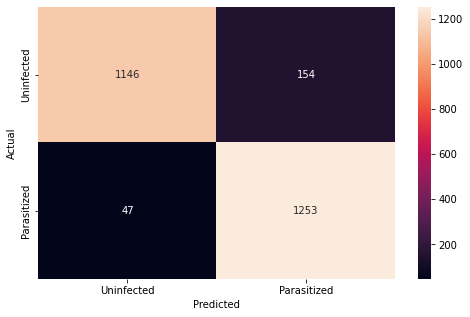

In [ ]:
# Evaluating the model on test data
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred5 = model5.predict(test_images)
pred5 = np.argmax(pred5,axis = 1) 
y_true5 = np.argmax(test_labels,axis = 1)
#Printing the classification report
print(classification_report(y_true5,pred5))

#Plotting the heatmap using confusion matrix
cm5 = confusion_matrix(y_true5,pred5)
plt.figure(figsize=(8,5))
sns.heatmap(cm5, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations: Model 5**
* Addition of augmentation sucessfully reduced overfitting (as compared to model 4 wo augmentation).  
* Demonstrates the relative performance of various optimizers


|         	| Test Accuracy 	| False negative<br>out of 1,300 	| False Positive<br>out of 1,300 	|
|---------	|---------------	|--------------------------------	|--------------------------------	|
| Base    	|      0.97     	|               41               	|               28               	|
| Model 1 	|      0.95     	|               65               	|               61               	|
| Model 2 	|      0.98     	|               22               	|               33               	|
| Model 3 	|      0.98     	|               23               	|               25               	|
| Model 4 	|      0.95     	|               65               	|               54               	|
| Model 5 	|      0.92     	|               47               	|               154              	|

###<b>Model 6: Transfer learning with data augmentation (Inception)



Reference: Some Inception code from https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/


####<b>Loading libraries</b>

In [ ]:
#Importing libraries required to load the data

import zipfile
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU, GlobalAvgPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

####<b>Loading the data</b>

In [ ]:
#Storing the path of the data file from the Google drive
path = '/content/drive/Othercomputers/My Laptop/!Mike_Sync/!MIT_Applied_Data_Science/7_Capstone_Project/cell_images.zip'

#The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
#Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

#Size of image so that each image has the same size
SIZE = 150

#Empty list to store the training images after they are converted to NumPy arrays
train_images = []

#Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            #Resizing each image to (64,64)
            image = image.resize((SIZE, SIZE))

            #Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                train_labels.append(1)
            else:
                train_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [ ]:
#Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

#Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 150

#Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

#Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            #Resizing each image to (64,64)!!!!150,150!!!!!!!!!!!!!!!!!!!!!!
            image = image.resize((SIZE, SIZE))
            
            #Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                test_labels.append(1)
            else:
                test_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
len(test_images)

2600

####<b>Normalize the images

In [ ]:
# try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images/255).astype('float32')
test_images = (test_images/255).astype('float32')

As we have done our preprocessing required and performed some EDA to gain some insights in our Milestone-1 so now we will try to build our model and try evaluating its performance.

####<b>One Hot Encoding on the train and test labels

In [ ]:
# Encoding Train Labels
train_labels=to_categorical(train_labels,2)
# Similarly let us try to encode test labels
test_labels=to_categorical(test_labels,2)

# print(train_labels)
#print(test_labels)



####<b>Train and Validation Accuracy Function

In [ ]:
# function to plot train and validation accuracy 
def plot_accuracy(history):
    N = len(history.history["accuracy"])
    plt.figure(figsize=(7,7))
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy", ls='--')
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy", ls='--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")

####<b>Augmentation Generator

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Using ImageDataGenerator to generate images
          

# Add Noise
def add_noise(img):
    VARIABILITY = 0.1 # customize this
    deviation = VARIABILITY*np.random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    #img = np.clip(img, 0., 255.)
    return img

datagen_aug = ImageDataGenerator(
      #rescale=1./255,
      # customize these and other parameters
      rotation_range=45,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0,
      zoom_range=0,
      #preprocessing_function=add_noise,
      horizontal_flip=True,
      fill_mode='nearest',
)

val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = datagen_aug.flow(x = X_train, y = y_train, batch_size=64, seed=42, shuffle=True)     

# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x= X_val, y = y_val, batch_size=64, seed=42, shuffle=True)



In [ ]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint




####<b>Loading the Base Model - Inception

In [ ]:
#Loading the Base Model

from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

####<b>Compiling and Fitting Model

In [ ]:
#Compile and Fit


for layer in base_model.layers:
    layer.trainable = False

In [ ]:

def build_model(optimizer):
  from tensorflow.keras import layers 
  from tensorflow.keras.optimizers import RMSprop

  x = layers.Flatten()(base_model.output)
  x = layers.Dense(256, activation='relu')(x)

  x = layers.Dense(128, activation='relu')(x)
  x = layers.Dropout(0.3)(x)

  x = layers.Dense(64, activation='relu')(x)


  # Add a final sigmoid layer with 2 node for classification output
  x = layers.Dense(2, activation='sigmoid')(x)

  model = tf.keras.models.Model(base_model.input, x)

  ##optimizer = RMSprop(lr=0.0001)
  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  


  return model

####<b> Training Model


In [ ]:
#Loop Through Optimizers

df_optimizer_comp = pd.DataFrame(columns=['Optimizer', 'Accuracy', 'Loss', 'Val_accuracy', 'Val_Loss'])

optimizer = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD', tf.keras.optimizers.Adamax(learning_rate = 0.0005)]


#inc_history = model.fit_generator(train_generator, validation_data = val_generator, steps_per_epoch = 100, epochs = 2)

for i in optimizer:
  model = build_model(i)
  #Fitting the model and running the model for 10 epochs
  epochs=10
  history = model.fit(
            train_generator, validation_data=val_generator,
            epochs=epochs,
            batch_size=32,
            #validation_split=0.1,
            verbose=2
  )



  temp_df = pd.DataFrame( 
        {
          'Optimizer': i,
          #'Epoch': history.history['Epoch']
          'Accuracy': history.history['accuracy'],
          'Loss': history.history['loss'], 
          'Val_accuracy': history.history['val_accuracy'],
          'Val_Loss': history.history['loss']
        }
      )
  df_optimizer_comp = df_optimizer_comp.append(temp_df, ignore_index=True)
  # Delete multiple columns from the dataframe
  temp_df = temp_df.drop(['Optimizer', 'Accuracy', 'Loss', 'Val_accuracy', 'Val_Loss'], axis=1)
  

Epoch 1/10
312/312 - 101s - loss: 0.6091 - accuracy: 0.6556 - val_loss: 0.4677 - val_accuracy: 0.8289 - 101s/epoch - 325ms/step
Epoch 2/10
312/312 - 89s - loss: 0.4252 - accuracy: 0.8095 - val_loss: 0.3639 - val_accuracy: 0.8706 - 89s/epoch - 287ms/step
Epoch 3/10
312/312 - 89s - loss: 0.3675 - accuracy: 0.8483 - val_loss: 0.3155 - val_accuracy: 0.8908 - 89s/epoch - 286ms/step
Epoch 4/10
312/312 - 89s - loss: 0.3389 - accuracy: 0.8646 - val_loss: 0.2891 - val_accuracy: 0.8984 - 89s/epoch - 285ms/step
Epoch 5/10
312/312 - 89s - loss: 0.3188 - accuracy: 0.8714 - val_loss: 0.2708 - val_accuracy: 0.9081 - 89s/epoch - 285ms/step
Epoch 6/10
312/312 - 89s - loss: 0.3075 - accuracy: 0.8780 - val_loss: 0.2578 - val_accuracy: 0.9105 - 89s/epoch - 286ms/step
Epoch 7/10
312/312 - 89s - loss: 0.2954 - accuracy: 0.8844 - val_loss: 0.2402 - val_accuracy: 0.9163 - 89s/epoch - 286ms/step
Epoch 8/10
312/312 - 89s - loss: 0.2935 - accuracy: 0.8870 - val_loss: 0.2323 - val_accuracy: 0.9181 - 89s/epoch - 2

In [ ]:
df_optimizer_comp.insert(loc=5,
          column='Epoch',
          value=0)


In [ ]:
# iterate through each row 
Epoch = 0
i=0
for i in range(len(df_optimizer_comp)-1):
  if df_optimizer_comp.iat[i,0] == df_optimizer_comp.iat[(i+1),0]:
    Epoch = Epoch +1
    df_optimizer_comp.at[(i+1),"Epoch"]=Epoch
  else:
    Epoch = 0
    df_optimizer_comp.at[(i+1),"Epoch"]=Epoch

In [ ]:
df_optimizer_comp

Optimizer  Accuracy      Loss  \
0                                            Adadelta  0.655615  0.609140   
1                                            Adadelta  0.809476  0.425171   
2                                            Adadelta  0.848342  0.367513   
3                                            Adadelta  0.864570  0.338908   
4                                            Adadelta  0.871431  0.318792   
5                                            Adadelta  0.877993  0.307455   
6                                            Adadelta  0.884403  0.295401   
7                                            Adadelta  0.886958  0.293465   
8                                            Adadelta  0.888761  0.286569   
9                                            Adadelta  0.889562  0.282993   
10                                            Adagrad  0.861114  0.337434   
11                                            Adagrad  0.896825  0.263782   
12                                            Adagrad  0.902334  0.251234   
13                                            Adagrad  0.907994  0.240201   
14                                            Adagrad  0.909596  0.231354   
15                                            Adagrad  0.912251  0.228275   
16                                            Adagrad  0.913052  0.228364   
17                                            Adagrad  0.913403  0.223536   
18                                            Adagrad  0.915206  0.219396   
19                                            Adagrad  0.913353  0.222980   
20                                               Adam  0.854002  0.467580   
21                                               Adam  0.897876  0.264848   
22                                               Adam  0.903085  0.248832   
23                                               Adam  0.907242  0.243135   
24                                               Adam  0.913453  0.225375   
25                                               Adam  0.914054  0.220914   
26                                               Adam  0.915757  0.220525   
27                                               Adam  0.918111  0.212321   
28                                               Adam  0.914755  0.220395   
29                                               Adam  0.917259  0.213237   
30                                            RMSprop  0.806721  0.863432   
31                                            RMSprop  0.880547  0.311844   
32                                            RMSprop  0.894421  0.280428   
33                                            RMSprop  0.898778  0.265663   
34                                            RMSprop  0.906892  0.249127   
35                                            RMSprop  0.906491  0.242237   
36                                            RMSprop  0.910247  0.235524   
37                                            RMSprop  0.912451  0.232157   
38                                            RMSprop  0.913603  0.232005   
39                                            RMSprop  0.919864  0.224663   
40                                                SGD  0.861765  0.339010   
41                                                SGD  0.897826  0.254838   
42                                                SGD  0.907142  0.237092   
43                                                SGD  0.909797  0.233330   
44                                                SGD  0.913753  0.226234   
45                                                SGD  0.912451  0.225411   
46                                                SGD  0.913954  0.228016   
47                                                SGD  0.915156  0.219727   
48                                                SGD  0.916658  0.215158   
49                                                SGD  0.914354  0.216886   
50  <keras.optimizer_v2.adamax.Adamax object at 0x...  0.869979  0.344422   
51  <keras.optimizer_v2.adamax.Adamax ob

####<b>Plot the train and validation accuracy

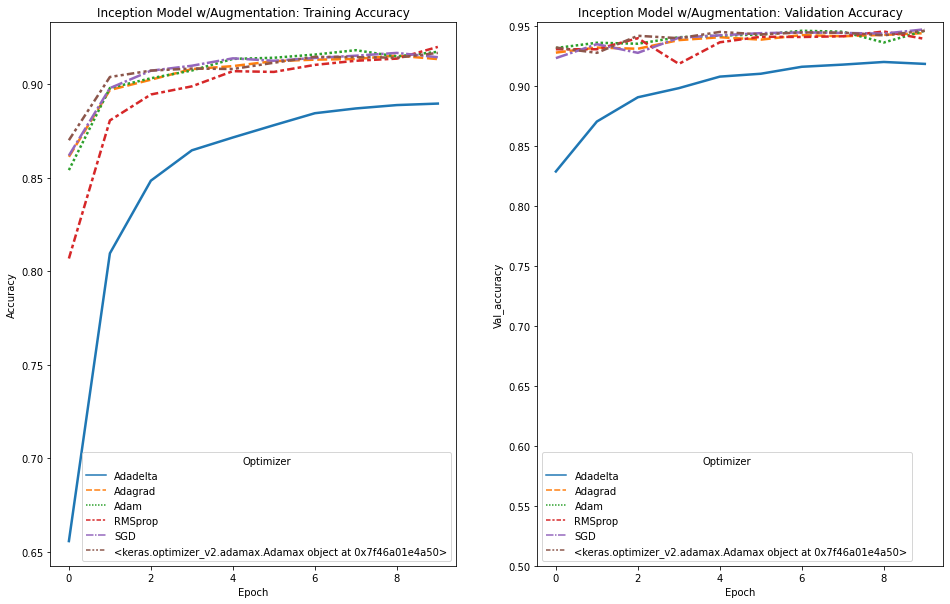

In [ ]:
fig, ax =plt.subplots(1,2)

sns.lineplot('Epoch', 'Accuracy', data=df_optimizer_comp, hue="Optimizer",style="Optimizer", palette="tab10", linewidth=2.5, ax=ax[0]).set(title='Inception Model w/Augmentation: Training Accuracy')
sns.lineplot('Epoch', 'Val_accuracy', data=df_optimizer_comp, hue="Optimizer",style="Optimizer", palette="tab10", linewidth=2.5, ax=ax[1]).set(title='Inception Model w/Augmentation: Validation Accuracy')

plt.yticks(np.arange(0.50, 1.00, 0.05))
fig.set_size_inches(16,10)

fig.show()

In [ ]:
accuracy = model.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 4s 34ms/step - loss: 0.1622 - accuracy: 0.9381

 Test_Accuracy:- 0.938076913356781


              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1300
           1       0.94      0.94      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



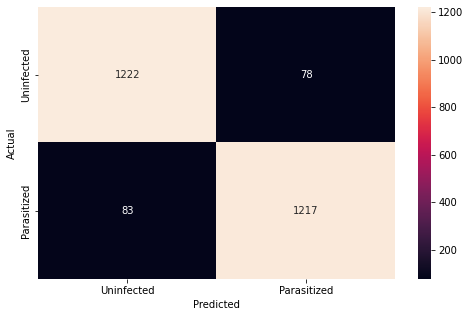

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)
#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations:** Model 6
* Addition of augmentation with InceptionV3 model sucessfully eliminated overfitting (as compared to model 4 wo augmentation and model 5 w/ augmentation)
* Demonstrates the relative performance of various optimizers


|         	| Test Accuracy 	| False negative<br>out of 1,300 	| False Positive<br>out of 1,300 	|
|---------	|---------------	|--------------------------------	|--------------------------------	|
| Base    	|      0.97     	|               41               	|               28               	|
| Model 1 	|      0.95     	|               65               	|               61               	|
| Model 2 	|      0.98     	|               22               	|               33               	|
| Model 3 	|      0.98     	|               23               	|               25               	|
| Model 4 	|      0.95     	|               65               	|               54               	|
| Model 5 	|      0.92     	|               47               	|               154              	|
| Model 6 	|      0.94     	|               83               	|               78               	|

###<b>Models 7 Hyperparameter Tuning with KerasTuner


---
[Reference](https://towardsdatascience.com/hyperparameter-tuning-with-kerastuner-and-tensorflow-c4a4d690b31a)

1. Run Base Model
  - Augmentation
  - Base Model with 1 Hidden Layer
2. Keras Tuner
  - Define the model
  - Specify which hyperparameters to tune
    - The number of hidden layers
    - The number of units in each hidden layer
    - The dropout percentage after each hidden layer
    - The learning rate of the Adam optimizer
  c. Define the search space
  d. Define the search algorithm
3. HyperResnet--FUTURE WORK
  - The version of the model
  - Depth of convolutional layers
  - Pooling
  - Learning rate
  - Optimization algorithm

**KyrasTuner Code Reference:**  https://keras.io/keras_tuner/


####<B>1. Baseline Model

In [ ]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

#####<b>Augmentation Generator

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images

# your code here
#def add_noise(img):
#    VARIABILITY = 0.1 # customize this
#    deviation = VARIABILITY*np.random.random()
#    noise = np.random.normal(0, deviation, img.shape)
#    img += noise
#    #img = np.clip(img, 0., 255.)
#    return img

datagen_aug = ImageDataGenerator(
      #rescale=1./255,
      # customize these and other parameters
      rotation_range=45,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0,
      zoom_range=0,
      #preprocessing_function=add_noise,
      horizontal_flip=True,
      fill_mode='nearest',
)

val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = datagen_aug.flow(x = X_train, y = y_train, batch_size=64, seed=42, shuffle=True)     

# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x= X_val, y = y_val, batch_size=64, seed=42, shuffle=True)



#Creating an iterable for images and labels from the training data
images, labels = next(train_generator)



#####<b>Base Model with 1 Hidden Layer

In [ ]:
pip install keras-tuner --upgrade

     |████████████████████████████████| 133 kB 5.1 MB/s 


In [ ]:
import tensorflow as tf
import kerastuner as kt
from tensorflow import keras


# Define Activation Function
activation_f = LeakyReLU(0.1)


# creating sequential model
model7 = Sequential()

# First Convolutional layer with 32 filters and kernel size of 2. Use the 'same' padding and input shape of 64*64*3
model7.add(Conv2D(32, (3,3), input_shape=(64, 64, 3), padding='same', activation=activation_f))

# max-pooling layer with a pool size of 2
model7.add(MaxPooling2D(pool_size=2))

# Add dropout to randomly switch off 20% neurons to reduce overfitting
model7.add(Dropout(0.2))

#BatchNormalization layer
#model7.add(BatchNormalization())

# Flatten the output from the previous layer
model7.add(Flatten())

# Hidden Layer 1
model7.add(Dense(512, activation=activation_f))
model7.add(Dropout(0.2))

# Output layer with nodes equal to the number of classes and softmax activation
model7.add(Dropout(0.1))
model7.add(Dense(2,activation="softmax"))   #2 represent output layer neurons


# Define Optimizer
adam = optimizers.Adam(learning_rate=0.001)


# Compile the Model
model7.compile(loss="binary_crossentropy", optimizer=adam, metrics = ['accuracy'])

# Number of epochs
NUM_EPOCHS = 20

# Callbacks help in saving the checkpoints and stopping at an accuracy where the model does not seem to improve
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]



history7 = model7.fit(train_generator, 
                                  validation_data=val_generator,
                                  batch_size=32,callbacks=callbacks,
                                  epochs=NUM_EPOCHS,verbose=1)



Epoch 1/20
312/312 [==============================] - 26s 80ms/step - loss: 0.6668 - accuracy: 0.6585 - val_loss: 0.6488 - val_accuracy: 0.6226
Epoch 2/20
312/312 [==============================] - 21s 67ms/step - loss: 0.5620 - accuracy: 0.7279 - val_loss: 0.5362 - val_accuracy: 0.7500
Epoch 3/20
312/312 [==============================] - 21s 67ms/step - loss: 0.5235 - accuracy: 0.7542 - val_loss: 0.4882 - val_accuracy: 0.7718
Epoch 4/20
312/312 [==============================] - 21s 66ms/step - loss: 0.4968 - accuracy: 0.7733 - val_loss: 0.5582 - val_accuracy: 0.6609
Epoch 5/20
312/312 [==============================] - 22s 69ms/step - loss: 0.4421 - accuracy: 0.8093 - val_loss: 0.4666 - val_accuracy: 0.7770
Epoch 6/20
312/312 [==============================] - 21s 67ms/step - loss: 0.4244 - accuracy: 0.8179 - val_loss: 0.3084 - val_accuracy: 0.8722
Epoch 7/20
312/312 [==============================] - 21s 66ms/step - loss: 0.3781 - accuracy: 0.8437 - val_loss: 0.4419 - val_accuracy:

In [ ]:
import pandas as pd

def evaluate_model(model, test_images, test_labels):

    eval_dict = model.evaluate(test_images, test_labels, return_dict=True)
    
    display_df = pd.DataFrame([eval_dict.values()], columns=[list(eval_dict.keys())])
    
    return display_df

# Evaluate model on test set and add results to dataframe
results = evaluate_model(model7, test_images, test_labels)

# Set index to 'Baseline'
results.index = ['Baseline']

# Display results
results.head()


82/82 [==============================] - 0s 4ms/step - loss: 0.2326 - accuracy: 0.9004


loss  accuracy
Baseline  0.232612  0.900385

####<B>2. Keras Tuner

#####<b>Define the Model

In [ ]:
def build_model(hp):
 
    # Define Activation Function
    activation_f = LeakyReLU(0.1)

    # creating sequential model
    model8 = keras.Sequential()

    # First Convolutional layer with 32 filters and kernel size of 2. Use the 'same' padding and input shape of 64*64*3
    model8.add(Conv2D(32, (3,3), input_shape=(64, 64, 3), padding='same', activation=activation_f))

    # max-pooling layer with a pool size of 2
    model8.add(MaxPooling2D(pool_size=2))

    # Add dropout to randomly switch off 20% neurons to reduce overfitting
    model8.add(Dropout(0.2))

    #BatchNormalization layer
    #model8.add(BatchNormalization())

    # Flatten the output from the previous layer
    model8.add(Flatten())
    


    # Hidden Layers:
    # Tune the number of hidden layers and units in each.
    # Number of hidden layers: 1 - 5
    # Number of Units: 32 - 512 with stepsize of 32
    for i in range(1, hp.Int("num_layers", 2, 6)):
        model8.add(
            keras.layers.Dense(
                units=hp.Int("units_" + str(i), min_value=32, max_value=512, step=32),
                activation="relu")
            )
        
        # Tune dropout layer with values from 0 - 0.3 with stepsize of 0.1.
        model8.add(keras.layers.Dropout(hp.Float("dropout_" + str(i), 0, 0.3, step=0.1)))
    
    # Add output layer.
    model8.add(keras.layers.Dense(units=2, activation="softmax"))
    
    # Tune learning rate for Adam optimizer with values from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])

    
    model8.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    

    return model8






In [ ]:
tuner = kt.RandomSearch(build_model,
                     objective="val_accuracy",
                     max_trials=7
                     )


In [ ]:
# Display search space summary

tuner.search(train_generator,validation_data=val_generator, epochs=5)

best_model = tuner.get_best_models()[0]

Trial 7 Complete [00h 01m 43s]
val_accuracy: 0.510817289352417

Best val_accuracy So Far: 0.8553686141967773
Total elapsed time: 00h 12m 41s
INFO:tensorflow:Oracle triggered exit


In [ ]:
# Get the optimal hyperparameters from the results
best_hps=tuner.get_best_hyperparameters()[0]

# Build model
model9 = tuner.hypermodel.build(best_hps)

# Train the hypertuned model
history9 = model9.fit(train_generator, validation_data=val_generator, epochs=NUM_EPOCHS, callbacks=callbacks, verbose=2)

Epoch 1/20
312/312 - 20s - loss: 0.6351 - accuracy: 0.6529 - val_loss: 0.5922 - val_accuracy: 0.6903 - 20s/epoch - 63ms/step
Epoch 2/20
312/312 - 19s - loss: 0.5653 - accuracy: 0.7172 - val_loss: 0.6286 - val_accuracy: 0.6276 - 19s/epoch - 61ms/step
Epoch 3/20
312/312 - 19s - loss: 0.5172 - accuracy: 0.7551 - val_loss: 0.5309 - val_accuracy: 0.7175 - 19s/epoch - 60ms/step
Epoch 4/20
312/312 - 19s - loss: 0.4779 - accuracy: 0.7744 - val_loss: 0.3957 - val_accuracy: 0.8169 - 19s/epoch - 61ms/step
Epoch 5/20
312/312 - 19s - loss: 0.3960 - accuracy: 0.8207 - val_loss: 0.5835 - val_accuracy: 0.6328 - 19s/epoch - 60ms/step
Epoch 6/20
312/312 - 19s - loss: 0.3310 - accuracy: 0.8590 - val_loss: 0.2612 - val_accuracy: 0.8916 - 19s/epoch - 60ms/step
Epoch 7/20
312/312 - 19s - loss: 0.2879 - accuracy: 0.8833 - val_loss: 0.2278 - val_accuracy: 0.9091 - 19s/epoch - 61ms/step
Epoch 8/20
312/312 - 19s - loss: 0.2779 - accuracy: 0.8874 - val_loss: 0.2179 - val_accuracy: 0.9243 - 19s/epoch - 60ms/step


In [ ]:
# Evaluate model on test set
hyper_df = evaluate_model(model9, test_images, test_labels)

# Set index to hypertuned
hyper_df.index = ["Hypertuned"]

# Append results in dataframe
results.append(hyper_df)

82/82 [==============================] - 0s 3ms/step - loss: 0.2256 - accuracy: 0.9008


loss  accuracy
Baseline    0.232612  0.900385
Hypertuned  0.225622  0.900769

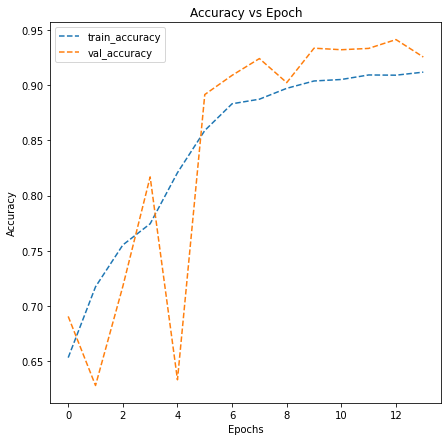

In [ ]:
# Evaluating the model on test data
# plotting the accuracies
plot_accuracy(history9)

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      1300
           1       0.85      0.97      0.91      1300

    accuracy                           0.90      2600
   macro avg       0.91      0.90      0.90      2600
weighted avg       0.91      0.90      0.90      2600



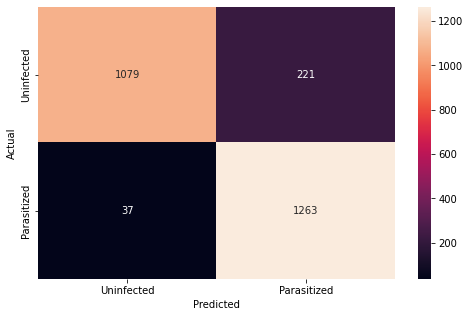

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred9 = model9.predict(test_images)
pred9 = np.argmax(pred9,axis = 1) 
y_true9 = np.argmax(test_labels,axis = 1)
#Printing the classification report
print(classification_report(y_true9,pred9))

#Plotting the heatmap using confusion matrix
cm9 = confusion_matrix(y_true9,pred9)
plt.figure(figsize=(8,5))
sns.heatmap(cm9, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations: Models 7**

* The base model (Model 7) uses the same augmentation as Model 6.  However, this model only contains 1 Convolutional Layer, 1 fully connected layer and an output layer.  
* As expected, Model 7 has the lowest test accuracy of all models.  I developed this so as to compare it to the results obtained by using a Keras hyperparameter tuner (Model 8).  
- With hyperparameter tuning, the test accuracy remained at 90%.  

|         	| Test Accuracy 	| False negative<br>out of 1,300 	| False Positive<br>out of 1,300 	|
|---------	|---------------	|--------------------------------	|--------------------------------	|
| Base    	|      0.97     	|               41               	|               28               	|
| Model 1 	|      0.95     	|               65               	|               61               	|
| Model 2 	|      0.98     	|               22               	|               33               	|
| Model 3 	|      0.98     	|               23               	|               25               	|
| Model 4 	|      0.95     	|               65               	|               54               	|
| Model 5 	|      0.92     	|               47               	|               154              	|
| Model 6 	|      0.94     	|               83               	|               78               	|
| Model 7 	|      0.90     	|               37               	|               221              	|
[table generator](https://tablesgenerator.com/markdown_tables#)

###<b> Technical Observations and Conclusions:
- Most models performed to acceptable levels for field implementation.  
- Sometimes the simplest technical solutions are best. 
- Models 2 and 3 are currently the optimum choice for the current implementation.  
- Further study should be performed incorporating more recent advancements in Transfer Learning Models.  




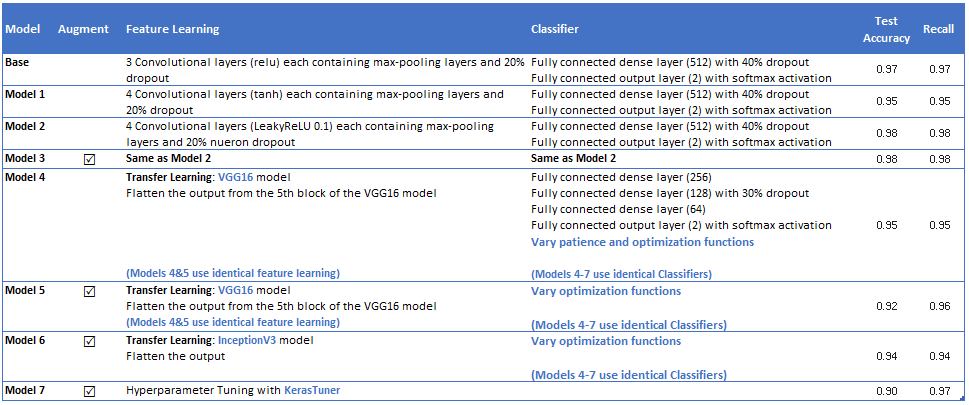

###<b> Future Work / Improvements:

**Technical**
- Continue development of state-of-art Transfer Model.  Target 99% accuracy/recall.  
- Verify diagnostic accuracy of current technology in our market testing location. 

**Business**
- Perform cost estimate to determine if Project Management Gate 4 Capex expenditures are still in alignment with previous stage 3 estimates.
- Develop rollout vision for market testing 
- Complete expense analysis based upon rollout vision

